<br>

<center> <strong> <font face="Courier New" size=5> Reinforcement Learning </font> </strong> </center>
<br>
<center>  <strong> <font face="Courier New" size=6 color='#62C885'> Taller 4</font> </strong> </center>

<br>
<center> <p> Docente: Fernando Enrique Lozano Martinez </p>
 <p> 
 Estudiantes: <br>
 Manuela Viviana Chacón Chamorro <br>
 Juan Ivan Cubillos Garay </p>
</center>

<br> 
<p> IELE <br> 
Facultad de Ingeniería <br>
Universidad de los Andes <br>
2023
</p>

---

In [ ]:
#Librerias 
import gym
import time
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
# Semilla para los aleatorios 
np.random.seed(202304)
random.seed(202304)

#Configuración general de gráficas 
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Introducción

<p align="justify">
En este taller se estudian diferentes enfoques de aprendizaje por refuerzo (RL) en el contexto del problema del Cart Pole. Este problema consiste en un poste vertical montado sobre un carro que puede moverse hacia la izquierda o hacia la derecha, como se presenta la Figura 1. El objetivo es mantener el poste en posición vertical el mayor tiempo posible evitando que se caiga. Los episodios se consideran finalizados cuando el carro sale de un rango de posición, el poste excede un rango angular o se acumula un cierto número de recompensa. En este sistema los estados corresponden a la posición del carro $x$, la velocidad de desplazamiento $\dot{x}$, el ángulo médido desde la vertical del poste $\theta$ y la velocidad angular $\dot{\theta}$. El espacio de acciones se representa como $\mathcal{A} = \{1, 0\}$, siendo $1$ la señal que empuja al carro hacia la derecha y 0 a la izquierda. Este sistema será simulado en el entorno de Cart Pole proporcionado por la liberia Gymnasium de OpenAI. Entorno que implementa el problema descrito de forma interactiva permitiendo realizar acciones, observar el siguiente estado y recibir una recompensa que indica el comportamiento del agente en esa transición.
</div>
<br>
<br>
    
<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1hwDIIq6iOd5NzQguPOyAUBD7dcepKELE" width="300"/>
    
    Figura 1. Diagrama de Cartpole.
</div>
</center>
    
<br>

<p align="justify">
El sistema de Cart Pole es la representación del sistema dinámico conocido como péndulo invertido. Este modelo es interesante de explorar ya que constituye un conjunto de ecuaciónes diferenciales no lineales, que al representarse en espacio de estados satisfacen las propiedades de estabilidad y controlabilidad. En consecuencia, teoricamente existe existe una señal de control, en este caso una secuencia de acciones, que permiten mantener el sistema sin dejar caer el poste. No obstante, encontar las acciones adecuadas puede ser un problema complejo, ya que, bajo ciertos parámetros del sistema y teniendo en cuenta la no linalidad de las funciones que rigen las dinamicas, el comportamiento de un péndulo puede llegar a ser potencialmente sensible a las condiciones iniciales.

<p align="justify">
Teniendo como contexto el problema planteado se exponen 8 algoritmos de RL para encontrar las acciones que mantengan el poste el mayor tiempo posible. Para este proposito se realizará la implementación y comparación del rendimiento de los algoritmos de RL tabulares SARSA y Q-learning, que utilizan una representación discreta del espacio de estados y acciones, con sus contrapartes que emplean aproximación de funciones, donde se emplean redes neuronales para aproximar la función de valor estado acción. En particular, para los algoritmos tabulares se realizarán dos discretizaciónes una con $~400$ estados y una más fina con $~4000$. Para el caso de los algoritmos de aproximación de funciones se trabaja con dos modelos neurales que corresponden a arquitecturas con una capa escondida con 4 y 16 neuronas. Para ambos enfoques, se realiza una sintonización de hiperparámetros, se presentan curvas de aprendizaje y se ejecutan pruebas finales con 1000 episodios. Adicionalmente, al finalizar este notebook se plantea un análisis y discusión de los experimentos realizados.

# Algoritmos Tabulares

<p align="justify">
En esta sección se implementan las funciones que ejecutan los métodos de aprendizaje por refuerzo SARSA y QLearning para el entorno CarPole. El algoritmo SARSA (On Policy) significa "State-Action-Reward-State-Action", lo que indica que el agente aprende a partir de la experiencia en un paso tomando en cuenta el estado actual del entorno, la acción que tomó, la recompensa que observa en la transición y el siguiente estado y acción que eligió. El proceso de entrenamiento de SARSA se realiza a través de cada episodio, en este caso el poste y el carrito comienzan en un estado inicial y se toma una acción, para observar un nuevo estado y una recompensa. Durante cada episodio, el algoritmo SARSA actualiza la función de valor del agente, que estima el valor esperado de la recompensa futura en función del estado y la acción. La actualización se realiza a través de la siguiente expresión:

$$Q(s,a) = Q(s,a) + \alpha (R + \gamma Q(s',a') - Q(s,a))$$

<p align="justify">
donde $R$ es la recompensa obtenida al tomar la acción $a$ en el estado $s$, $s'$ es el estado siguiente, $\alpha$ es la tasa de aprendizaje y $\gamma$ es el factor de descuento. Al finalizar el proceso la política aprendida corresponde a la política greedy respecto a $Q$. 
<p align="justify">
El algoritmo Q-learning la política óptima tambien depende de la estimación de la función de valor óptima para los pares estado-acción, el proceso de estimación de esta función se realiza mediante la técnica de "bootstraping", lo que significa que la regla de actualización utiliza estimaciones previas de los valores de $Q_{\star}(s,a)$ para actualizar su estimación actual, o de estimaciones para los estados siguientes ($Q(s',a')$). La actualización para algun par $(s,a)$ se realiza:

$$Q(s,a) = Q(s,a) + \alpha (R + \gamma \max_{a'}(Q(s',a')) - Q(s,a))$$
<p align="justify">
Incluir el término $\max_{a'}(Q(s',a'))$ en la actualización implica no utilizar la misma política que esta siguiendo $Q$, si no una acción greedy, por esta razón el algoritmo Q-learning es de caracter off-policy. Despues de varias iteraciones del algoritmo la función $Q(s,a), \forall s, a$ converge a $Q_{\star}(s,a), \forall s, a$ si todos los pares $s,a$ se visitan frecuentemente. Similar al algoritmo SARSA la política aprendida corresponde a la política greedy respecto a $Q$.

## Implementación algoritmos

<p align="justify">
La siguientes funciones implementan los algorimos SARSA y Qlearning, en ambos método es posible establecer el valor de $\alpha$, $\epsilon$ y $\gamma$, además se incluyó una bandera que indica si se trabajará con la discretización fina de estados ($~4000$) o no. Estas funciones se complemetan con la función playPolicy, la cual ejecuta simulaciones hasta que el entorno finalizace, cada simulación se denotada en este notebook como juegos. La función playPolicy regresa una lista con el valor de la duración de los juegos. De manera similar se cuenta con la función visualizatedPolicy la cual permite visualizar en el entorno gráfico el comportamiento del sistema Carpole siguiendo alguna política fijada para las dos versiones de la discretización de estados. 

In [ ]:
def playPolicy(policyQ, numberGames, discreteStateFlag):
    # Función ejecuta episodios de la simulación del sistema CarPole
    # Entradas:
    # policyQ = diccionario de política 
    # numberGames = número de veces que se ejecuta la simulación
    # discreteStateFlag = True para discretrización final, False para discretización cruda 
    # Retorna 
    # Lista con longitudes de los episodios 
    lenSets = [] 
    for _ in range(numberGames):
        state = env.reset()
        if discreteStateFlag: S = discreteStateFine(state)
        else: S = discreteState(state)
        done = False
        k = 0
        while not done:
            action = policyQ[S]
             # Tomar la acción en el entorno y obtener la observación siguiente, la recompensa y el estado del entorno
            obs, reward, done, info  = env.step(action)
            if discreteStateFlag: S = discreteStateFine(obs)
            else: S = discreteState(obs)
            k += 1
        lenSets.append(k)
    return lenSets 

In [ ]:
def visualizatedPolicy(policy, discreteStateFlag):
    # Función que visualiza la simulación del sistema CarPole con la politica policy
    # Entradas:
    # policy = diccionario de política 
    # discreteStateFlag = True para discretrización final, False para discretización cruda 
    # Retorna 
    # duración episodio y visualización de la simulación  
    env = gym.make('CartPole-v1')
    state = env.reset()
    if discreteStateFlag: S = discreteStateFine(state)
    else: S = discreteState(state)
    done = False
    k = 0
    while not done:
        env.render()
        action = policy[S]
        obs, reward, done, info = env.step(action)
        if discreteStateFlag: S = discreteStateFine(obs)
        else: S = discreteState(obs)
        k += 1
    return k

### SARSA

La siguiente función implementa el algotimo SARSA para el ambiente de CarPole teniendo en cuenta el tipo de discretización de los estados. 

In [ ]:
def SARSA(alpha, epsilon, gamma, numberIterations, boardState, actionAvailable, discreteStateFlag):
    
    # SARSA
    
    # Entradas 
    # alpha = tasa de aprendizjae
    # epsilon = epsilon de política
    # gamma = factor de descuento 
    # numberIterations = número de iteraciones 
    # boardState = estados posibles 
    # actionAvailable = acciones posibles 
    # discreteStateFlag = True para discretrización final, False para discretización cruda 
    
    # Retorna 
    # piOptimalSARSA = política óptima encontrada
    # curveLearning = lista con la duraciónd de cada episodio durante el aprendizaje
    # Tiempo de entrenamietno time.time() - startTime
    
    # Iniciar tiempo
    startTime = time.time()
    
    # Inicializar q(s,a)   
    Q = {}
    for s in boardState:
        for a in actionAvailable: Q[(s,a)] = 0
        
    numberActions = len(actionAvailable)
    curveLearning = []
    # Ciclo del método 
    for _ in range(numberIterations):

        # Inicializar el ambiente
        env = gym.make('CartPole-v1')
        env.seed(202304)
        state = env.reset()

        if discreteStateFlag: S = discreteStateFine(state)
        else: S = discreteState(state)

        # Tomar A e-greedy
        indexActionGreedy = np.argmax([Q[(S,action)] for action in actionAvailable]) # accion greedy respecto a Q
        probabilitiesAction = (epsilon/numberActions)*np.ones((numberActions)) # vector con probabilidades e/k para todas 
        probabilitiesAction[indexActionGreedy] = 1-epsilon + (epsilon/numberActions) # le pongo a la accion greedy 1-e + e/k
        A = random.choices(actionAvailable, weights=probabilitiesAction, k=1)[0] # Tomo A 
        k = 0
        while True: # Ciclo del episodio 
          # Tomar A, ver S' y R
          SNewContinuos, R, flag, info = env.step(A)
          if discreteStateFlag: SNew =  discreteStateFine(SNewContinuos)
          else: SNew =  discreteState(SNewContinuos)

          # Hacer A' greedy con Q
          indexActionGreedy = np.argmax([Q[(SNew,action)] for action in actionAvailable]) # accion greedy respecto a Q
          probabilitiesAction = (epsilon/numberActions)*np.ones((numberActions)) # vector con probabilidades e/k para todas 
          probabilitiesAction[indexActionGreedy] = 1-epsilon + (epsilon/numberActions) # le pongo a la accion greedy 1-e + e/k
          ANew = random.choices(actionAvailable, weights=probabilitiesAction, k=1)[0] # Tomo A  
          Q[(S,A)]  += alpha*(R + gamma*(Q[(SNew, ANew)])- Q[(S,A)]) # Regla de actualización 
          S = SNew
          A = ANew
          k += 1
          if flag: break;
        curveLearning.append(k)

    piOptimalSARSA = {}
    for s in boardState:
      Qmax = [Q[(s,action)] for action in actionAvailable]
      actionBetter = actionAvailable[np.argmax(Qmax)]
      piOptimalSARSA[s] = actionBetter
    
    return piOptimalSARSA, curveLearning, time.time() - startTime

### Q-learning

La siguiente función implementa el algotimo QLearning para el ambiente de CarPole teniendo en cuenta el tipo de discretización de los estados. 

In [ ]:
def Qlearning(alpha, epsilon, gamma, numberIterations, boardState, actionAvailable, discreteStateFlag):
  # Esta función realiza el algoritmo QLearning y encuentra la política óptima 
  # despues de un numero de iteraciones. La función requiere la función playPolicy 
  # para esto deberan estar cargados todos los elementos que a su vez requiere playPolicy
  
   #Entradas 
   # alpha = tasa de aprendizjae
   # epsilon = epsilon de política
   # gamma = factor de descuento 
   # numberIterations = número de iteraciones 
   # boardState = estados posibles 
   # actionAvailable = acciones posibles 
   # discreteStateFlag = True para discretrización final, False para discretización cruda 
    
   # Retorna 
   # piOptimalQlearning = política óptima encontrada
   # curveLearning = lista con la duraciónd de cada episodio durante el aprendizaje
   # Tiempo de entrenamietno time.time() - startTime

  # Iniciar tiempo
  startTime = time.time()
  
  # Inicializar q(s,a) 
  Q = {}
  for s in boardState:
    for a in actionAvailable:
        Q[(s,a)] = 0

  numberActions = len(actionAvailable)
  curveLearning = []
  # Ciclo del método 
  for _ in range(numberIterations):
    # Inicializar algun en la posición 1 del tablero de juego 
    env = gym.make('CartPole-v1')
    env.seed(202304)
    env.action_space.seed(202304)
    state = env.reset()
    if discreteStateFlag: S =  discreteStateFine(state)
    else: S =  discreteState(state)
    k = 0
    while True:

      # Hacer A e-greedy (podría ser cualquier otra política que explore)
      indexActionGreedy = np.argmax([Q[(S,action)] for action in actionAvailable]) # accion greedy respecto a Q
      probabilitiesAction = (epsilon/numberActions)*np.ones((numberActions)) # vector con probabilidades e/k para todas 
      probabilitiesAction[indexActionGreedy] = 1-epsilon + (epsilon/numberActions) # agregar a la accion greedy 1-e + e/k
      A = random.choices(actionAvailable, weights=probabilitiesAction, k=1)[0] # Tomar A 
      
      # Tomar A, observar nuevo estado SNew y la recompensa en la transición 
      SNewContinuos, R, flag, info = env.step(A)
      if discreteStateFlag: SNew =  discreteStateFine(SNewContinuos)
      else: SNew =  discreteState(SNewContinuos)
      
      # Hacer greedy respecto a Q la política en el estado SNew
      maxA = max([Q[(SNew,a)] for a in actionAvailable]) 
      
      # Regla de actualización 
      Q[(S,A)] += alpha*(R + gamma*(maxA)- Q[(S,A)]) 

      S = SNew
      k += 1
      if flag: break;
    curveLearning.append(k)
  # Hacer greedy la función Q[(s,a)] para todos los pares y conseguir v(s) optima
  piOptimalQlearning = {}
  for s in boardState:
      Qmax = [Q[(s,action)] for action in actionAvailable]
      actionBetter = actionAvailable[np.argmax(Qmax)]
      piOptimalQlearning[s] = actionBetter
  return piOptimalQlearning, curveLearning, time.time() - startTime

## Discretización cruda

<p align="justify">
Esta discretizacion del espacio de CarPole se va a utilizar para los metodos tabulares, SARSA y QLearning. Se considera una discretización que tenga alrededor de $\sim 400$ estados. Teniendo en cuenta que el sistema tiene estados continuos para la posición del carro, la posición angular del poste y sus velocidades, se propone participar estos espacios se la siguiente manera:

* 4 espacios en la posicion del carro: estado 0 $(-\infty, -1.22]$, estado 1 $(-1.22, 0]$, estado 2 $(0, 1.22]$ y estado 3: $(1.22, \infty)$. 

* 4 espacios en la distribución de velocidad: estado 0 $(-\infty, -0.5]$, estado 1 $(-0.5, 0]$, estado 2 $(0, 0.5]$ y estado 3: $(0.5, \infty)$. 

* 7 estados en la posición del poste:  estado 0 $(-\infty, -12°]$, estado 1 $(-12°, -6°]$, estado 2 $(-6°, -1°]$ y estado 3: $(-1°, 1°]$, estado 4 $(1°, 6°]$, estado 5 $(6°, 12°]$ y estado 6 $(12°, \infty)$ 

* 4 estados en la velocidad angular. estado 0 $(-\infty, -0.87]$, estado 1 $(-0.87, 0]$, estado 2 $(0, 0.87]$ y estado 3: $(0.87, \infty)$. 

<p align="justify">
Esta discretización se realizó teniendo en cuenta que el carrito puede estar en el intervalo $(-2.4, 2.4)$ y tener una velocidad de desplazamiento en el rango $(-\infty, \infty)$. Para el poste se puede estar entre $(-12°, 12°)$ y tener una velocidad angular de $(-\infty, \infty)$. La posición del poste es la variable más inestable, es factible que el poste caiga al tener pequeñas variaciones del ángulo. Además, si se logran mantener ángulos pequeños las no linealidades de las ecuaciones diferenciales se pueden eliminar ($\theta ≈ \sin(\theta$). Por esta razón se decidió poner más estados en esta variable, y se incluyó un estado entre el rango $(-1°, 1°)$, este estado sería el más deseao. Por otra parte, considerndo que la velocidad nefativa o positiva da información relevante sobre el sistema se consideró en estas variables una discretización que preserva la simetría del signo, por esto se tienen estados separados para las velocidades negativas y positivas. 

In [ ]:
def discreteState(state):
    # Esta función realiza la discretización de los cuatro estados del sistema CarPole 
    
    # Entradas 
    # state = vector de estados 
    # Salida
    # tupla (statePos, stateVelocity, statePosPole, stateAngularVelocity) discretización
    
    statePosContinuos = state[0]
    stateVelContinuos = state[1]
    statePosPoleContinuos = state[2]
    stateWContinuos = state[3]
     
    # Discretización en 4 estados la posición del carro
    
    if statePosContinuos <= -1.2:
        statePos = 0
    elif statePosContinuos <= 0 and statePosContinuos > - 1.2:
        statePos = 1
    elif statePosContinuos <= 1.2 and statePosContinuos > 0:
         statePos = 2
    elif statePosContinuos > 1.2:
        statePos = 3

    # Distribución de la velocidad en 4 estados con simetria 
    
    if stateVelContinuos <= -0.5:
        stateVelocity = 0
    elif stateVelContinuos <= 0 and stateVelContinuos > - 0.5:
        stateVelocity = 1
    elif stateVelContinuos <= 0.5 and stateVelContinuos > 0:
         stateVelocity = 2
    elif stateVelContinuos > 0.5:
        stateVelocity = 3
        
    # Distribución del pos polo con 7 estados
    
    if statePosPoleContinuos <= -0.209:
        statePosPole = 0 # Estado terminal 
    elif statePosPoleContinuos <= -0.104 and statePosPoleContinuos > -0.209:
        statePosPole = 1
    elif statePosPoleContinuos <= -0.017 and statePosPoleContinuos > -0.104:
         statePosPole = 2
    elif statePosPoleContinuos <= 0.017 and statePosPoleContinuos > -0.017:
        statePosPole = 3
    elif statePosPoleContinuos <= 0.104 and statePosPoleContinuos > 0.017:
        statePosPole = 4
    elif statePosPoleContinuos <= 0.209 and statePosPoleContinuos > 0.104:
        statePosPole = 5
    elif statePosPoleContinuos > 0.209:
        statePosPole = 6  # Estado terminal 
        
    # En 4 estados     
    if stateWContinuos <= -0.87:
        stateAngularVelocity = 0
    elif stateWContinuos <= 0 and stateWContinuos > - 0.87:
        stateAngularVelocity = 1
    elif stateWContinuos <= 0.87 and stateWContinuos > 0:
         stateAngularVelocity = 2
    elif stateWContinuos > 0.87:
        stateAngularVelocity = 3    
    
    return (statePos, stateVelocity, statePosPole, stateAngularVelocity)

Con esta discretización se genera un espacio de estados de 448 posiciones. 

In [ ]:
actionAvailable = [0, 1]

boardState = []

for pos in range(4):
    for vel in range(4):
        for posPole in range(7):
            for velPole in range(4):
                boardState.append((pos, vel, posPole, velPole))
print(len(boardState))

448


### Implementación SARSA discretización cruda 

<p align="justify">
A continuación se implementa el algoritmo SARSA sobre la discretización cruda. Este algoritmo varia su respuesta dependiendo la configuración de hiper-parámetros, en este caso $\alpha$ y $\epsilon$. Para encontrar un desempeño favorable del algoritmo se buscan los mejores hiperparametros ($\alpha$, $\epsilon$), tal que se logren mejores resultados con este método tablular. Para esto se entrena el algoritmo con 2000 episodios y finalizada esta etapa se generan 100 juegos para los cuales se determina el promedio de la longitud de los episodios y su desviación estandar. Este proceso se realiza para cada valor de la lista de hiperparametros, es decir se implementa una busqueda de grilla, para unos valores predefinidos de los hiperparámetros, en total se ejecutaran 16 configuraciones. Los resultados del promedio y la desviación estandar se representaran en matrices de calor, señalando en colores claros los valores más altos. 

In [ ]:
env = gym.make('CartPole-v1')

In [ ]:
# Listas de hiperparámetros 
alphas = [0.1, 0.2, 0.3, 0.5]
epsilons = [0.1, 0.15, 0.2, 0.25]

gamma = 1
numberIterations = 2000
numberGames = 100

meanLens = np.zeros((4, 4))
stdLens = np.zeros((4, 4))

policiesByAlphaEpsilon = {}
curveLearningByAlphaEpsilon = {}
timeRunByAlphaEpsilon = {}

j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    policyS, curveLearning, timeRun = SARSA(alpha, epsilon, gamma, numberIterations, boardState, actionAvailable, False)
    print(f'Modelo alpha: {alpha}, epsilon: {epsilon}, finalizado')
    lenSets = playPolicy(policyS, numberGames, False)
    print(f'Modelo alpha: {alpha}, epsilon: {epsilon}, promedio longitud episodios {np.mean(lenSets)}, tiempo {timeRun}')
    print('\n')
    meanLens[i][j] = np.mean(lenSets)
    stdLens[i][j] = np.std(lenSets)
    curveLearningByAlphaEpsilon[(alpha, epsilon)] = curveLearning
    timeRunByAlphaEpsilon[(alpha, epsilon)] = timeRun
    policiesByAlphaEpsilon[(alpha, epsilon)] = policyS
    i += 1
  j += 1

Modelo alpha: 0.1, epsilon: 0.1, finalizado
Modelo alpha: 0.1, epsilon: 0.1, promedio longitud episodios 31.0, tiempo 37.36439251899719


Modelo alpha: 0.1, epsilon: 0.15, finalizado
Modelo alpha: 0.1, epsilon: 0.15, promedio longitud episodios 30.89, tiempo 37.54653263092041


Modelo alpha: 0.1, epsilon: 0.2, finalizado
Modelo alpha: 0.1, epsilon: 0.2, promedio longitud episodios 77.23, tiempo 33.846503257751465


Modelo alpha: 0.1, epsilon: 0.25, finalizado
Modelo alpha: 0.1, epsilon: 0.25, promedio longitud episodios 24.1, tiempo 34.23160791397095


Modelo alpha: 0.2, epsilon: 0.1, finalizado
Modelo alpha: 0.2, epsilon: 0.1, promedio longitud episodios 77.22, tiempo 44.09813213348389


Modelo alpha: 0.2, epsilon: 0.15, finalizado
Modelo alpha: 0.2, epsilon: 0.15, promedio longitud episodios 115.53, tiempo 41.527470111846924


Modelo alpha: 0.2, epsilon: 0.2, finalizado
Modelo alpha: 0.2, epsilon: 0.2, promedio longitud episodios 194.63, tiempo 34.47264218330383


Modelo alpha: 0.2, 

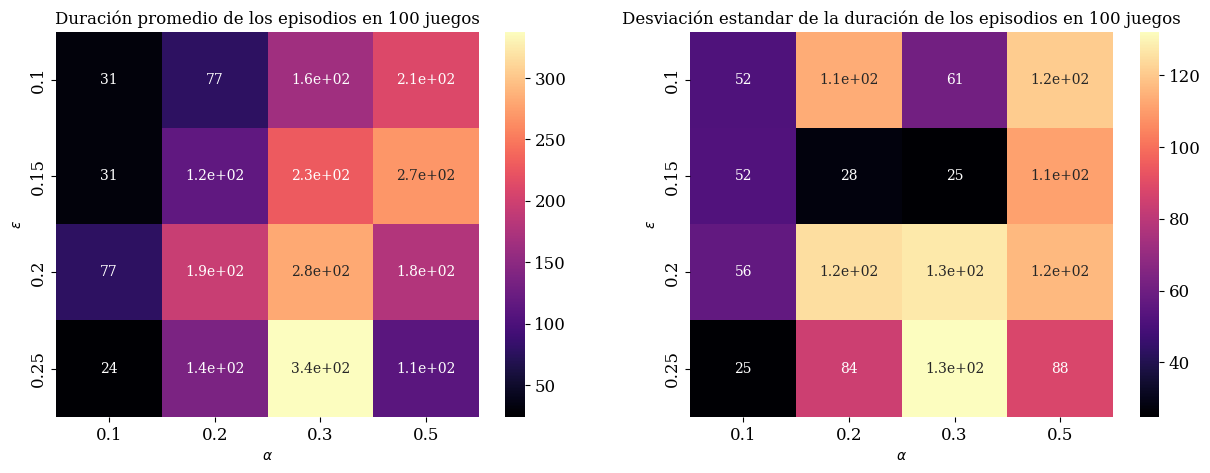

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(meanLens, cmap='magma', ax = ax[0], annot = True)
sns.heatmap(stdLens, cmap='magma', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Duración promedio de los episodios en 100 juegos')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar de la duración de los episodios en 100 juegos')
plt.show()

In [ ]:
maxMean = np.argmax(meanLens)
maxEpsilon, maxAlpha = np.unravel_index(maxMean, meanLens.shape)
print(f'Los episodios con mayor duración promedio ({np.max(meanLens)}), y desviación estandar ({np.std(meanLens)}) se consiguen con: alpha = {alphas[maxAlpha]}, epsilon = {epsilons[maxEpsilon]}')
policySARSA = policiesByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
curveSARSA = curveLearningByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
timeSARSA = timeRunByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
print(f'El método tardó en el aprendizaje {timeSARSA}')

Los episodios con mayor duración promedio (337.61), y desviación estandar (92.36429359259657) se consiguen con: alpha = 0.3, epsilon = 0.25
El método tardó en el aprendizaje 29.374362230300903


<p align="justify">
Para este caso, con el algoritmo SARSA los episodios con mayor duración promedio en pruebas de 100 juegos se consiguieron con: alpha = 0.3 y epsilon = 0.25, valores en los cuales se logra un promedio de (337.61). Sin embargo, la desviacióne estandar de este método con estos hiper-parámetros es elevada tambien. Esto quiere decir que hubieron episodios en los cuales el algoritmo logró excelentes resultados pero en otras ocasiones el desempeño no fue adecuado. 

<p align="justify">
A continuación se muestra la gráfica de la evolución de la longitud de los episodios durante el proceso de iteraciones del algoritmo SARSA, para esta gráfica, y en general las gráficas de este tipo que se encuentran en este documento, no se consideró un promedio sobre varias realizaciones, ya que, cada ejecución del algoritmo generaría una política distinta y no tendría sentido realizar un promedio sobre curvas que finalmente indican diferentes políticas.  En la gráfica se puede evidenciar una tendencia creciente, sin embargo tambien es claro que el proceso no es monótono, por el contrario es altamente variable. Este comportamiento puede explicarse desde la naturaleza del problema abordado, el cual presenta una alta dependencia de las condiciones iniales, esto sumado a que debe mantener exploración y explotación puede explicar el comportamiento expuesto. 

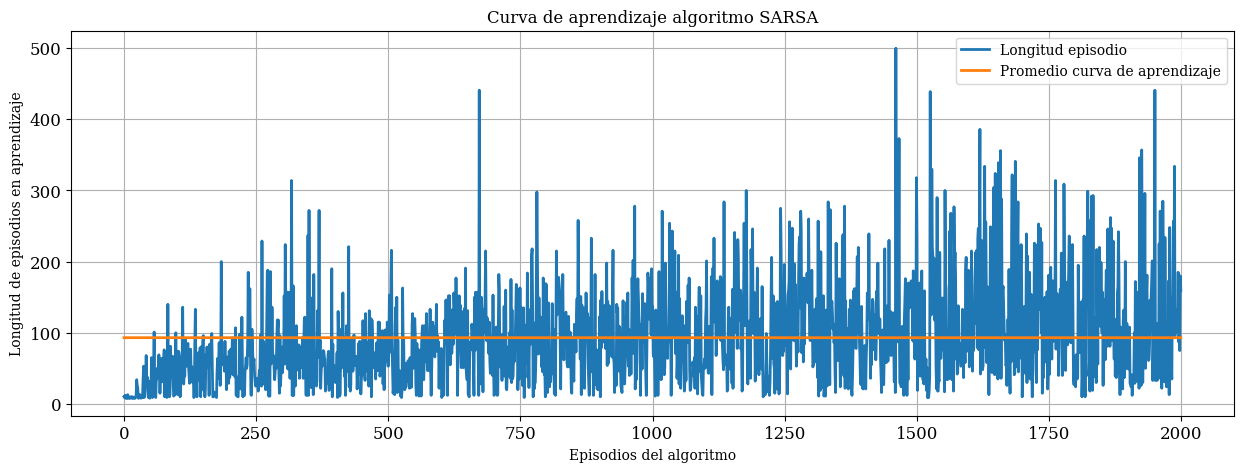

In [ ]:
# Curva de aprendizaje longitud en cada episodio entrenamiento
plt.figure(figsize=(15,5))
plt.title('Curva de aprendizaje algoritmo SARSA')
plt.ylabel('Longitud de episodios en aprendizaje')
plt.xlabel('Episodios del algoritmo')
plt.grid()
plt.plot(curveSARSA, lw = 2, label = 'Longitud episodio')
plt.plot(np.ones((len(curveSARSA),))*np.mean(curveSARSA), lw = 2, label = 'Promedio curva de aprendizaje')
plt.legend()
plt.show()

Para diez episodios se realiza la visualización de la política encontrada en el entorno CarPole. Estos episodios se pueden observar en el enlace adjunto. 

In [ ]:
# Video de la solución
time.sleep(10)
for i in range(10):
    time.sleep(1)
    lenSet = visualizatedPolicy(policySARSA, False)
    print(f'El episodio {i} de la visualización duró {lenSet} pasos')
env.close()

El episodio 0 de la visualización duró 257 pasos
El episodio 1 de la visualización duró 209 pasos
El episodio 2 de la visualización duró 500 pasos
El episodio 3 de la visualización duró 239 pasos
El episodio 4 de la visualización duró 345 pasos
El episodio 5 de la visualización duró 110 pasos
El episodio 6 de la visualización duró 360 pasos
El episodio 7 de la visualización duró 500 pasos
El episodio 8 de la visualización duró 312 pasos
El episodio 9 de la visualización duró 500 pasos


In [ ]:
HTML('<iframe width="500" height="350" src="https://www.youtube.com/embed/oHG1jOeKl54" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


[Ver video SARSA 448](https://www.youtube.com/embed/oHG1jOeKl54)

### Implementación QLearning discretización cruda 

<p align="justify">
Similar al algoritmo anterior, para QLearning también se buscan los mejores hiperparametros ($\alpha$, $\epsilon$), tal que logren mejores resultados con el método tablular. Para esto se entrena el algoritmo con 2000 episodios y finalizada esta etapa se generan 100 juegos para los cuales se determina el promedio de la longitud de los episodios y su desviación estandar, esto para cada valor de la lista de hiperparametros. 

In [ ]:
env = gym.make('CartPole-v1')

In [ ]:
# Lista de hiperparámetros
alphas = [0.1, 0.2, 0.3, 0.5]
epsilons = [0.1, 0.15, 0.2, 0.25]

gamma = 1
numberIterations = 2000
numberGames = 100

meanLens = np.zeros((4, 4))
stdLens = np.zeros((4, 4))

policiesByAlphaEpsilonQL = {}
curveLearningByAlphaEpsilon = {}
timeRunByAlphaEpsilon = {}

j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    policyQL, curveLearning, timeRun = Qlearning(alpha, epsilon, gamma, numberIterations, boardState, actionAvailable, False)
    print(f'Modelo alpha: {alpha}, epsilon: {epsilon}, finalizado')
    lenSets = playPolicy(policyQL, numberGames, False)
    print(f'Modelo alpha: {alpha}, epsilon: {epsilon}, promedio longitud episodios {np.mean(lenSets)}, tiempo {timeRun}')
    print('\n')
    meanLens[i][j] = np.mean(lenSets)
    stdLens[i][j] = np.std(lenSets)
    policiesByAlphaEpsilonQL[(alpha, epsilon)] = policyQL
    curveLearningByAlphaEpsilon[(alpha, epsilon)] = curveLearning
    timeRunByAlphaEpsilon[(alpha, epsilon)] = timeRun
    
    i += 1
  j += 1

Modelo alpha: 0.1, epsilon: 0.1, finalizado
Modelo alpha: 0.1, epsilon: 0.1, promedio longitud episodios 42.46, tiempo 53.380688190460205


Modelo alpha: 0.1, epsilon: 0.15, finalizado
Modelo alpha: 0.1, epsilon: 0.15, promedio longitud episodios 115.67, tiempo 39.51732420921326


Modelo alpha: 0.1, epsilon: 0.2, finalizado
Modelo alpha: 0.1, epsilon: 0.2, promedio longitud episodios 14.37, tiempo 47.91719436645508


Modelo alpha: 0.1, epsilon: 0.25, finalizado
Modelo alpha: 0.1, epsilon: 0.25, promedio longitud episodios 54.27, tiempo 47.66026592254639


Modelo alpha: 0.2, epsilon: 0.1, finalizado
Modelo alpha: 0.2, epsilon: 0.1, promedio longitud episodios 25.85, tiempo 47.678579568862915


Modelo alpha: 0.2, epsilon: 0.15, finalizado
Modelo alpha: 0.2, epsilon: 0.15, promedio longitud episodios 139.75, tiempo 46.69955635070801


Modelo alpha: 0.2, epsilon: 0.2, finalizado
Modelo alpha: 0.2, epsilon: 0.2, promedio longitud episodios 35.64, tiempo 45.40610694885254


Modelo alpha: 0.2

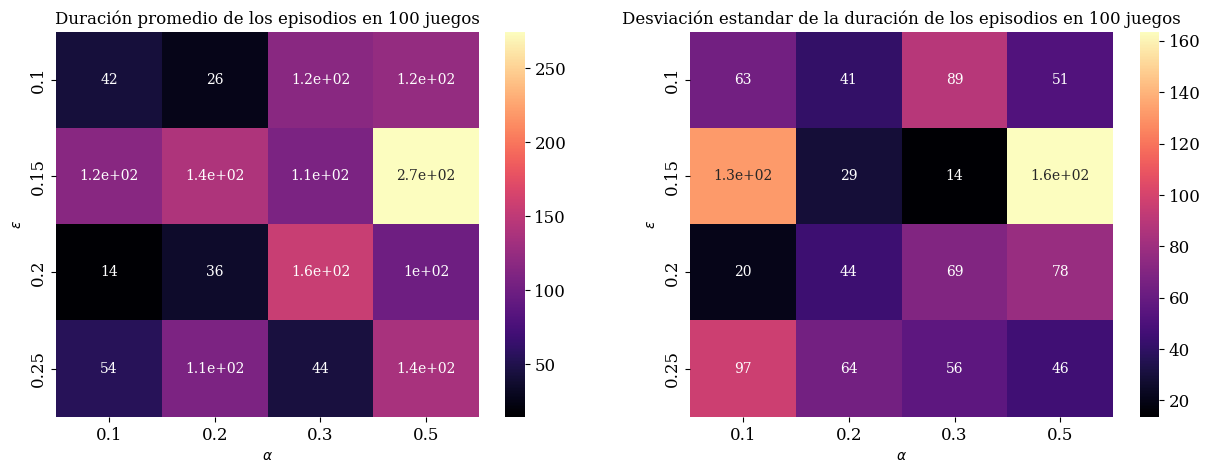

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(meanLens, cmap='magma', ax = ax[0], annot = True)
sns.heatmap(stdLens, cmap='magma', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Duración promedio de los episodios en 100 juegos')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar de la duración de los episodios en 100 juegos')
plt.show()

In [ ]:
maxMean = np.argmax(meanLens)
maxEpsilon, maxAlpha = np.unravel_index(maxMean, meanLens.shape)
print(f'Los episodios con mayor duración promedio ({np.max(meanLens)}) y desviación ({np.std(meanLens)}) se consiguen con: alpha = {alphas[maxAlpha]}, epsilon = {epsilons[maxEpsilon]}')
policyQLearning = policiesByAlphaEpsilonQL[(alphas[maxAlpha], epsilons[maxEpsilon])]
curveQL = curveLearningByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
timeQL = timeRunByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
print(f'El método tardó en el aprendizaje {timeQL}')

Los episodios con mayor duración promedio (274.82) y desviación (62.89574886270136) se consiguen con: alpha = 0.5, epsilon = 0.15
El método tardó en el aprendizaje 34.838515758514404


<p align="justify">
Con el algoritmo QLearning los episodios con mayor duración promedio en 100 juegos (274.82) se consiguieron con: $\alpha = 0.5$ y $\epsilon = 0.15$, sin embargo, similar al caso anterior, la desviacióne estandar de este método con estos hiper-parámetros es elevada tambien. Esto indica el mismo comportamiento anterior, episodios en los cuales el algoritmo logró excelentes resultados pero en otras ocasiones el desempeño no fue adecuado. A continuación se muestra la gráfica de la evolución de la longitud de los episodios durante el proceso de iteraciones del algoritmo QLearning. 

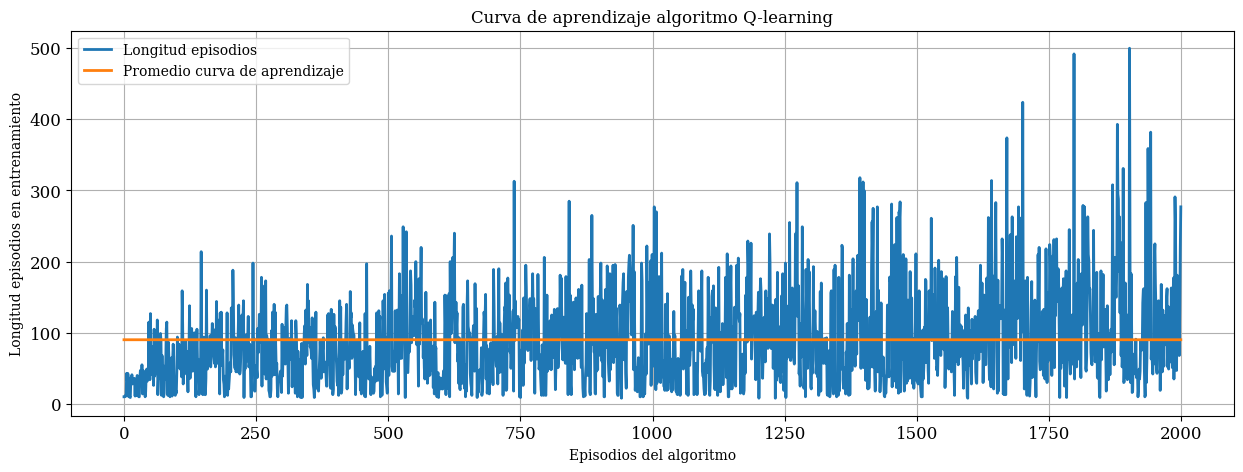

In [ ]:
# Curva de aprendizaje promedio longitud en 10 juegos en cada episodio
plt.figure(figsize=(15,5))
plt.title('Curva de aprendizaje algoritmo Q-learning')
plt.ylabel('Longitud episodios en entrenamiento')
plt.xlabel('Episodios del algoritmo')
plt.grid()
plt.plot(curveQL, lw = 2, label = 'Longitud episodios')
plt.plot(np.ones((len(curveQL),))*np.mean(curveQL), lw = 2, label = 'Promedio curva de aprendizaje')
plt.legend()
plt.show()

Para diez episodios se realiza la visualización de la política encontrada en el entorno CarPole. Estos episodios se pueden observar en el enlace adjunto. 

In [ ]:
time.sleep(10)
for i in range(10):
    time.sleep(1)
    lenSet = visualizatedPolicy(policyQLearning, False)
    print(f'El episodio {i} de la visualización duró {lenSet} pasos')
env.close()

El episodio 0 de la visualización duró 500 pasos
El episodio 1 de la visualización duró 264 pasos
El episodio 2 de la visualización duró 411 pasos
El episodio 3 de la visualización duró 381 pasos
El episodio 4 de la visualización duró 500 pasos
El episodio 5 de la visualización duró 290 pasos
El episodio 6 de la visualización duró 409 pasos
El episodio 7 de la visualización duró 500 pasos
El episodio 8 de la visualización duró 500 pasos
El episodio 9 de la visualización duró 500 pasos


In [ ]:
HTML('<iframe width="500" height="350" src="https://www.youtube.com/embed/D-tlCM8wbdU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

[Ver video QLearning 448](https://www.youtube.com/embed/D-tlCM8wbdU)

## Discretización fina

Como se ha mencionado el espacio de estados original de Cart Pole es continuo $\mathbb{R}^4$, la discretización propuesta en la sección anterior es buena, sin embargo para aproximarse a la continuidad de los estados se puede incrementar el número de particiones para crear estados discretos más finos. Siguiento esta idea en esta sección se propone la discretizacion del espacio de CarPole, incluyendo aproximadamente $\sim4000$ estados. Para este caso se utilizan:

* 8 espacios en la posicion del carro, distribuidos uniformemene entre $[-1.2, 1.2]$ y considerando los estados $(-\infty, -1.22]$ y $(1.2, \infty)$. 

* 8 espacios en la distribución de velocidad: distribuidos uniformemene entre $[-0.5 0.5]$ y considerando los estados $(-\infty, -0.5]$ y $(0.5, \infty)$. 

* 8 estados en la posición del poste:  distribuidos uniformemene entre $[-12°, 12°]$ y considerando los estados $(-\infty, -12°]$ y $(12°, \infty)$. 

* 8 estados en la velocidad angular: distribuidos uniformemene entre $[-0.87, 0.87]$ y considerando los estados $(-\infty, -0.87]$ y $(0.87, \infty)$. 

<p align="justify">
Esta discretización se realizó teniendo en cuenta lo considerado en la discretización cruda. En este caso se particionó el espacio en segmentos iguales considerando estados límite fuera de un intervalo específico. Además, dado que se cuenta con estados pares en las velocidades la discretización preserva la simetría del signo. 

In [ ]:
def discreteStateFine(state):
    
    # Esta función realiza la discretización de los cuatro estados del sistema CarPole 
    
    # Entradas 
    # state = vector de estados 
    # Salida
    # tupla (statePos, stateVelocity, statePosPole, stateAngularVelocity) discretización  
    
    statePosContinuos = state[0]
    stateVelContinuos = state[1]
    statePosPoleContinuos = state[2]
    stateWContinuos = state[3]
     
    # Discretización en 8 estados la posición del carro
    
    numberDiscreteState = 8
    stateDiscretePos = np.linspace(-1.2, 1.2, numberDiscreteState - 1) # 6
    if statePosContinuos < -1.2: statePos = 0
    elif statePosContinuos >= 1.2: statePos = 7
    else:
        for i in range(numberDiscreteState - 1):
            if stateDiscretePos[i] <= statePosContinuos < stateDiscretePos[i + 1]:
                statePos = i + 1

    # Distribución de la velocidad en 8 estados con simetria
    
    stateDiscreteVel = np.linspace(-0.5, 0.5, numberDiscreteState - 1) # 6
    if stateVelContinuos < -0.5: stateVelocity = 0
    elif stateVelContinuos >= 0.5: stateVelocity = 7
    else:
        for i in range(numberDiscreteState - 1):
            if stateDiscreteVel[i] <= stateVelContinuos < stateDiscreteVel[i + 1]:
                stateVelocity = i + 1

    # Distribución del pos polo con 8 estados
    
    stateDiscretePosPole = np.linspace(-0.209, 0.209, numberDiscreteState - 1) # 6
    if statePosPoleContinuos < -0.209: statePosPole = 0
    elif statePosPoleContinuos >= 0.209: statePosPole = 7
    else:
        for i in range(numberDiscreteState - 1):
            if stateDiscretePosPole[i] <= statePosPoleContinuos < stateDiscretePosPole[i + 1]:
                statePosPole = i + 1
        
    # Distribución de la velocidad angular en 8 estados con simetria
    
    stateDiscreteW = np.linspace(-0.87, 0.87, numberDiscreteState - 1) 
    if stateWContinuos < -0.87: stateAngularVelocity = 0
    elif stateWContinuos >= 0.87: stateAngularVelocity = 7
    else:
        for i in range(numberDiscreteState - 1):
            if stateDiscreteW[i] <= stateWContinuos < stateDiscreteW[i + 1]:
                stateAngularVelocity = i + 1 
    
    return (statePos, stateVelocity, statePosPole, stateAngularVelocity)

Con esta discretización se genera un espacio de estados de 4096 posiciones.

In [ ]:
actionAvailable = [0, 1]

boardState = []

for pos in range(8):
    for vel in range(8):
        for posPole in range(8):
            for velPole in range(8):
                boardState.append((pos, vel, posPole, velPole))
print(len(boardState))

4096


### Implementación SARSA con discretización fina 

<p align="justify">
En esta sección se sintonizan los mejores hiperparametros ($\alpha$, $\epsilon$) , tal que logren mejores resultados con el método tablular SARSA. Para esto se entrena el algoritmo con 4000 episodios, en esta versión se consideró que al tener un espacio de estados más grande se requieren más episodios. Similar al caso anterior al terminar las iteraciones de SARSA se generan 100 juegos para los cuales se determina el promedio de la longitud de los episodios y su desviación estandar, esto para cada valor de la lista de hiperparametros. Al finalizar se escoge la combinación de hiper-parámetros que maximice la duración promedio de pasos de cada episodio. 

In [ ]:
env = gym.make('CartPole-v1')

In [ ]:
# Lista de hiperparámetros 
alphas = [0.1, 0.2, 0.3, 0.5]
epsilons = [0.1, 0.15, 0.2, 0.25]

gamma = 1
numberIterations = 4000
numberGames = 100

meanLens = np.zeros((4, 4))
stdLens = np.zeros((4, 4))

policiesByAlphaEpsilon = {}
curveLearningByAlphaEpsilon = {}
timeRunByAlphaEpsilon = {}

j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    policyS, curveLearning, timeRun = SARSA(alpha, epsilon, gamma, numberIterations, boardState, actionAvailable, True)
    print(f'Modelo alpha: {alpha}, epsilon: {epsilon}, finalizado')
    lenSets = playPolicy(policyS, numberGames, True)
    print(f'Modelo alpha: {alpha}, epsilon: {epsilon}, promedio longitud episodios {np.mean(lenSets)}, tiempo {timeRun}')
    print('\n')
    meanLens[i][j] = np.mean(lenSets)
    stdLens[i][j] = np.std(lenSets)
    policiesByAlphaEpsilon[(alpha, epsilon)] = policyS
    curveLearningByAlphaEpsilon[(alpha, epsilon)] = curveLearning
    timeRunByAlphaEpsilon[(alpha, epsilon)] = timeRun
    
    i += 1
  j += 1

Modelo alpha: 0.1, epsilon: 0.1, finalizado
Modelo alpha: 0.1, epsilon: 0.1, promedio longitud episodios 25.18, tiempo 142.95454907417297


Modelo alpha: 0.1, epsilon: 0.15, finalizado
Modelo alpha: 0.1, epsilon: 0.15, promedio longitud episodios 28.09, tiempo 132.52096509933472


Modelo alpha: 0.1, epsilon: 0.2, finalizado
Modelo alpha: 0.1, epsilon: 0.2, promedio longitud episodios 35.07, tiempo 176.48175024986267


Modelo alpha: 0.1, epsilon: 0.25, finalizado
Modelo alpha: 0.1, epsilon: 0.25, promedio longitud episodios 19.35, tiempo 147.09413838386536


Modelo alpha: 0.2, epsilon: 0.1, finalizado
Modelo alpha: 0.2, epsilon: 0.1, promedio longitud episodios 185.49, tiempo 214.73700976371765


Modelo alpha: 0.2, epsilon: 0.15, finalizado
Modelo alpha: 0.2, epsilon: 0.15, promedio longitud episodios 41.31, tiempo 215.0819606781006


Modelo alpha: 0.2, epsilon: 0.2, finalizado
Modelo alpha: 0.2, epsilon: 0.2, promedio longitud episodios 47.75, tiempo 166.68820595741272


Modelo alpha: 

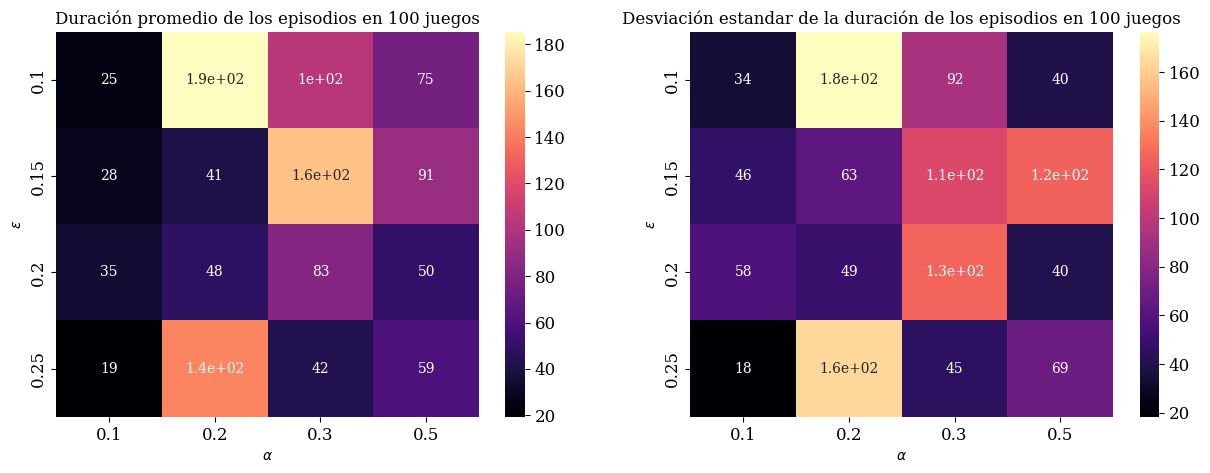

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(meanLens, cmap='magma', ax = ax[0], annot = True)
sns.heatmap(stdLens, cmap='magma', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Duración promedio de los episodios en 100 juegos')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar de la duración de los episodios en 100 juegos')
plt.show()

In [ ]:
maxMean = np.argmax(meanLens)
maxEpsilon, maxAlpha = np.unravel_index(maxMean, meanLens.shape)
print(f'Los episodios con mayor duración promedio ({np.max(meanLens)}) y desviación ({np.std(meanLens)}) se consiguen con: alpha = {alphas[maxAlpha]}, epsilon = {epsilons[maxEpsilon]}')
policySARSA4k = policiesByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
curveSARSA4k = curveLearningByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
timeSARSA = timeRunByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
print(f'El método tardó en el aprendizaje {timeSARSA}')

Los episodios con mayor duración promedio (185.49) y desviación (49.449673560443) se consiguen con: alpha = 0.2, epsilon = 0.1
El método tardó en el aprendizaje 214.73700976371765


<p align="justify">
Despues de realizar el proceso de la sintonización de hiper-parámetros para SARSA en discritzación fina, se consiguió que los episodios con mayor duración promedio (185.49) en 100 juegos se logran con: $\alpha = 0.2$ y $\epsilon = 0.1$. De manera similar a los resultados de la sección anterior, la desviacióne estandar de este método con estos hiper-parámetros es la mayor, situación que no es muy adecuada ya que implica una alta variabilidad en la ejecución de la política. A continuación se muestra la gráfica de la evolución de la longitud de los episodios durante el proceso de iteraciones del algoritmo SARSA. 

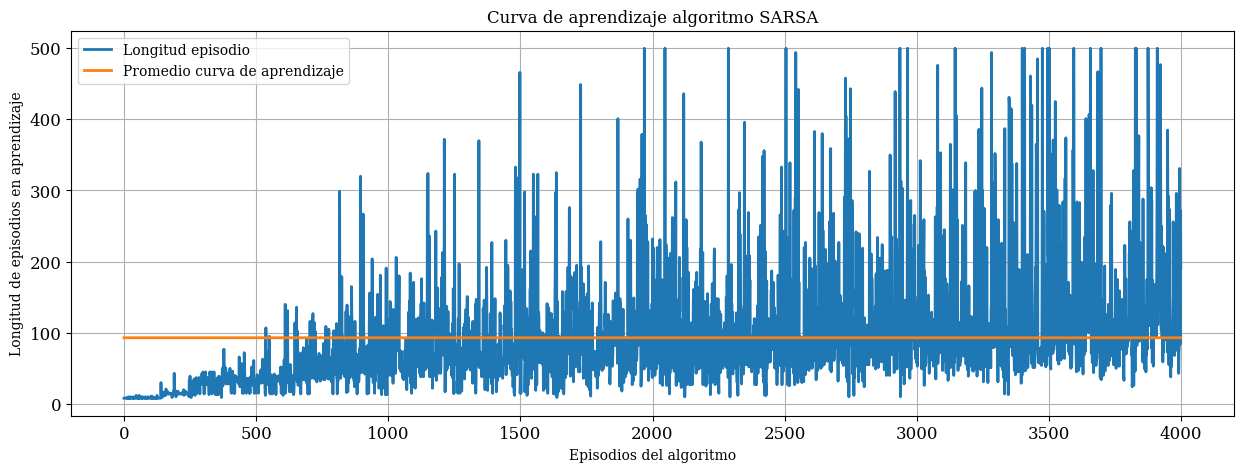

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Curva de aprendizaje algoritmo SARSA')
plt.ylabel('Longitud de episodios en aprendizaje')
plt.xlabel('Episodios del algoritmo')
plt.grid()
plt.plot(curveSARSA4k, lw = 2, label = 'Longitud episodio')
plt.plot(np.ones((len(curveSARSA4k),))*np.mean(curveSARSA4k), lw = 2, label = 'Promedio curva de aprendizaje')
plt.legend()
plt.show()

Para diez episodios se realiza la visualización de la política encontrada en el entorno CarPole. Estos episodios se pueden observar en el enlace adjunto. 

In [ ]:
# Visualización 
time.sleep(10)
for i in range(10):
    time.sleep(1)
    lenSet = visualizatedPolicy(policySARSA4k, True)
    print(f'El episodio {i} de la visualización duró {lenSet} pasos')
env.close()

El episodio 0 de la visualización duró 13 pasos
El episodio 1 de la visualización duró 146 pasos
El episodio 2 de la visualización duró 374 pasos
El episodio 3 de la visualización duró 339 pasos
El episodio 4 de la visualización duró 285 pasos
El episodio 5 de la visualización duró 500 pasos
El episodio 6 de la visualización duró 167 pasos
El episodio 7 de la visualización duró 500 pasos
El episodio 8 de la visualización duró 19 pasos
El episodio 9 de la visualización duró 405 pasos


In [ ]:
HTML('<iframe width="500" height="350" src="https://www.youtube.com/embed/hYvR3iz6DaM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

[Ver video SARSA 4096](https://www.youtube.com/embed/hYvR3iz6DaM)

### Implementación QLearning discretización fina

<p align="justify">
En esta sección se lleva a cabo un proceso de ajuste fino de los mejores hiperparámetros ($\alpha$, $\epsilon$) para obtener mejores resultados con el método QLearning. Se entrena el algoritmo durante 4000 episodios, ya que, como se mencionó en el anterior método en esta versión se considera que dado que el espacio de estados es más grande se requieren más episodios para un aprendizaje efectivo. Al finalizar la ejecución del algoritmo QLearning, se generan 100 juegos adicionales. Para cada valor en la lista de hiperparámetros, se calcula el promedio de la longitud de los episodios y su desviación estándar. Este análisis se realiza para evaluar y comparar el rendimiento de los diferentes valores de hiperparámetros y los resultados se presentan en un mapa de calor. 

In [ ]:
# Lista de hiperparámetros
alphas = [0.1, 0.2, 0.3, 0.5]
epsilons = [0.1, 0.15, 0.2, 0.25]

gamma = 1
numberIterations = 4000
numberGames = 100

meanLens = np.zeros((4, 4))
stdLens = np.zeros((4, 4))

policiesByAlphaEpsilonQL = {}
curveLearningByAlphaEpsilon = {}
timeRunByAlphaEpsilon = {}

j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    policyQL, curveLearning, timeRun = Qlearning(alpha, epsilon, gamma, numberIterations, boardState, actionAvailable, True)
    print(f'Modelo alpha: {alpha}, epsilon: {epsilon}, finalizado')
    lenSets = playPolicy(policyQL, numberGames, True)
    print(f'Modelo alpha: {alpha}, epsilon: {epsilon}, promedio longitud episodios {np.mean(lenSets)}, tiempo {timeRun}')
    print('\n')
    meanLens[i][j] = np.mean(lenSets)
    stdLens[i][j] = np.std(lenSets)
    policiesByAlphaEpsilonQL[(alpha, epsilon)] = policyQL
    curveLearningByAlphaEpsilon[(alpha, epsilon)] = curveLearning
    timeRunByAlphaEpsilon[(alpha, epsilon)] = timeRun
    i += 1
  j += 1

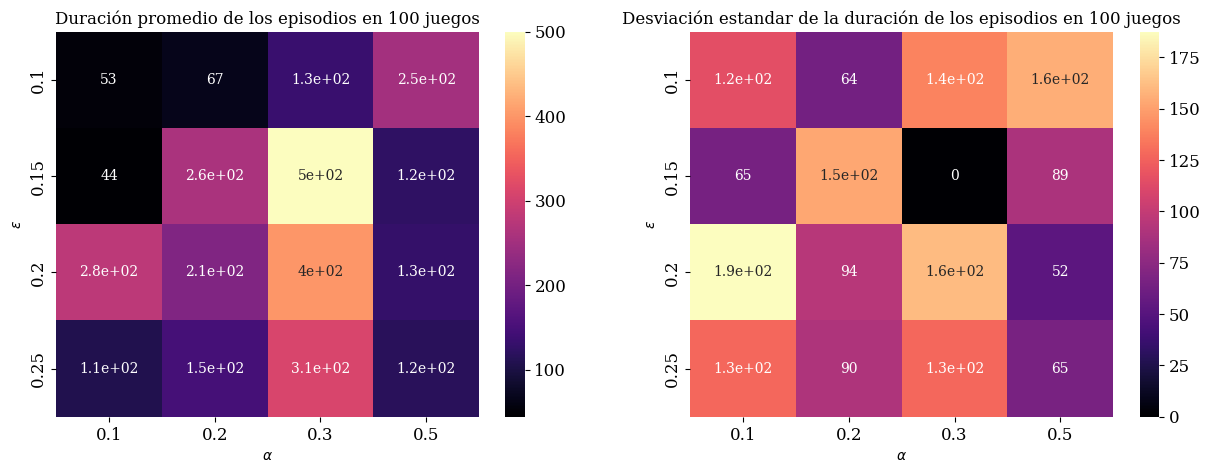

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(meanLens, cmap='magma', ax = ax[0], annot = True)
sns.heatmap(stdLens, cmap='magma', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Duración promedio de los episodios en 100 juegos')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar de la duración de los episodios en 100 juegos')
plt.show()

In [ ]:
maxMean = np.argmax(meanLens)
maxEpsilon, maxAlpha = np.unravel_index(maxMean, meanLens.shape)
print(f'Los episodios con mayor duración promedio ({np.max(meanLens)}) y desviación  ({np.std(meanLens)}) se consiguen con: alpha = {alphas[maxAlpha]}, epsilon = {epsilons[maxEpsilon]}')
policyQL4k = policiesByAlphaEpsilonQL[(alphas[maxAlpha], epsilons[maxEpsilon])]
curveQL4k = curveLearningByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
timeQL4k = timeRunByAlphaEpsilon[(alphas[maxAlpha], epsilons[maxEpsilon])]
print(f'El método tardó en el aprendizaje {timeQL4k}')

Los episodios con mayor duración promedio (500.0) y desviación  (125.36696653599584) se consiguen con: alpha = 0.3, epsilon = 0.15
El método tardó en el aprendizaje 437.5334894657135


<p align="justify">
Después de llevar a cabo el proceso de ajuste fino de hiperparámetros para el método QLearning en discretización fina de 4096 estados, se logró con $\alpha = 0.2$ y $\epsilon = 0.1$ obtener episodios con una duración promedio de 500 en 100 juegos, es decir en todos los juegos se logró el máximo posible. Además, a diferencia de los otros métodos la desviación estandar para esta combinación de hiper-parámetros no fue la más alta, esto indica un buen desempeño del algoritmo. A continuación se muestra una gráfica que ilustra la evolución de la longitud de los episodios durante el proceso de iteraciones del algoritmo QLearning.

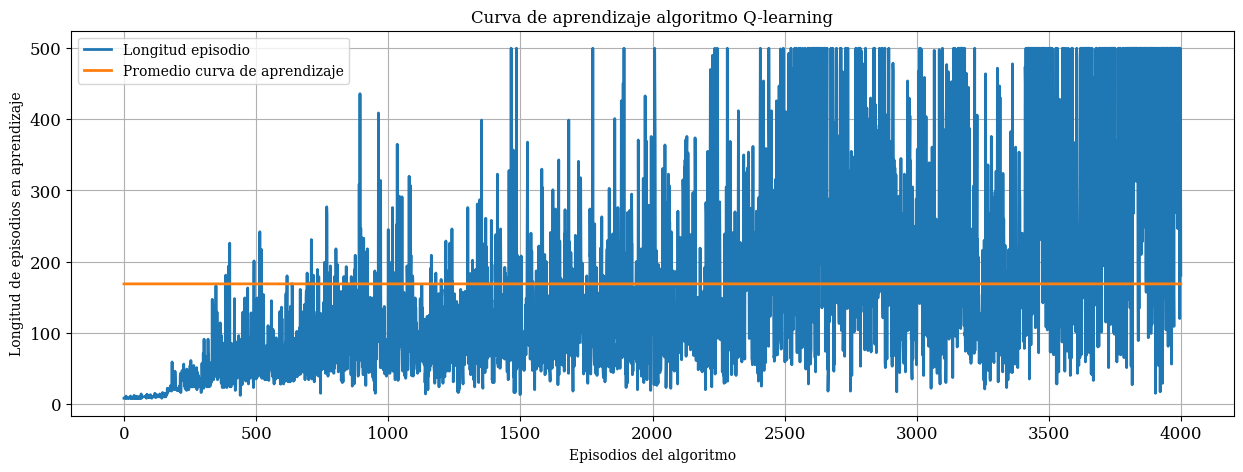

In [ ]:
# Curva de aprendizaje promedio longitud en 10 juegos en cada episodio
plt.figure(figsize=(15,5))
plt.title('Curva de aprendizaje algoritmo Q-learning')
plt.ylabel('Longitud de episodios en aprendizaje')
plt.xlabel('Episodios del algoritmo')
plt.grid()
plt.plot(curveQL4k, lw = 2, label = 'Longitud episodio')
plt.plot(np.ones((len(curveQL4k),))*np.mean(curveQL4k), lw = 2, label = 'Promedio curva de aprendizaje')
plt.legend()
plt.show()

Finalmente se realiza la visualización de la política para diez juegos, el comportamiento se muestra en el video adjunto. 

In [ ]:
time.sleep(10)
for i in range(10):
    time.sleep(1)
    lenSet = visualizatedPolicy(policyQL4k, True)
    print(f'El episodio {i} de la visualización duró {lenSet} pasos')
env.close()

El episodio 0 de la visualización duró 500 pasos
El episodio 1 de la visualización duró 500 pasos
El episodio 2 de la visualización duró 500 pasos
El episodio 3 de la visualización duró 500 pasos
El episodio 4 de la visualización duró 500 pasos
El episodio 5 de la visualización duró 500 pasos
El episodio 6 de la visualización duró 500 pasos
El episodio 7 de la visualización duró 500 pasos
El episodio 8 de la visualización duró 500 pasos
El episodio 9 de la visualización duró 500 pasos


In [ ]:
HTML('<iframe width="500" height="350" src="https://www.youtube.com/embed/0D_mVC4FyIY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

[Ver video QL 4096](https://www.youtube.com/embed/0D_mVC4FyIY)

## Gráficos episodios con políticas encontradas 

<p align="justify">
En esta sección, se generan gráficas que representan la longitud del episodio en 1000 juegos para las políticas encontradas mediante los métodos tabulares en ambas discretizaciones. Estas gráficas permiten visualizar el desempeño de las políticas en términos de la duración de los episodios, brindando una perspectiva de su eficacia en la resolución del problema. Además, se calcula el promedio de la longitud de episodios y su desviación estandar, estos resultados se sintetizan en una tabla. 

In [ ]:
numberGames = 1000

#Jugadas para SARSA crudo
lenSetsSARSA = playPolicy(policySARSA, numberGames, False)
print(f'Longitud promedio de los episodios {np.mean(lenSetsSARSA)} y desviación {np.std(lenSetsSARSA)}  en SARSA discretización 448')

# Jugadas para SARSA fino
lenSetsSARSA4k = playPolicy(policySARSA4k, numberGames, True)
print(f'Longitud promedio de los episodios {np.mean(lenSetsSARSA4k)} y desviación {np.std(lenSetsSARSA4k)} en SARSA discretización 4096')

Longitud promedio de los episodios 332.001 y desviación 123.07648434611706  en SARSA discretización 448
Longitud promedio de los episodios 210.431 y desviación 182.11988150391485 en SARSA discretización 4096


In [ ]:
numberGames = 1000

# Jugadas para Q-learning crudo
lenSetsQL = playPolicy(policyQLearning, numberGames, False)
print(f'Longitud promedio de los episodios {np.mean(lenSetsQL)} y desviación {np.std(lenSetsQL)} en Qlearning discretización 448')

# Jugadas para Q-learning fino 
lenSetsQL4k = playPolicy(policyQL4k, numberGames, True)
print(f'Longitud promedio de los episodios {np.mean(lenSetsQL4k)} y desviación {np.std(lenSetsQL4k)}en Qlearning discretización 4096')

Longitud promedio de los episodios 292.552 y desviación 161.98134243177515 en Qlearning discretización 448
Longitud promedio de los episodios 493.567 y desviación 37.12289739500407en Qlearning discretización 4096


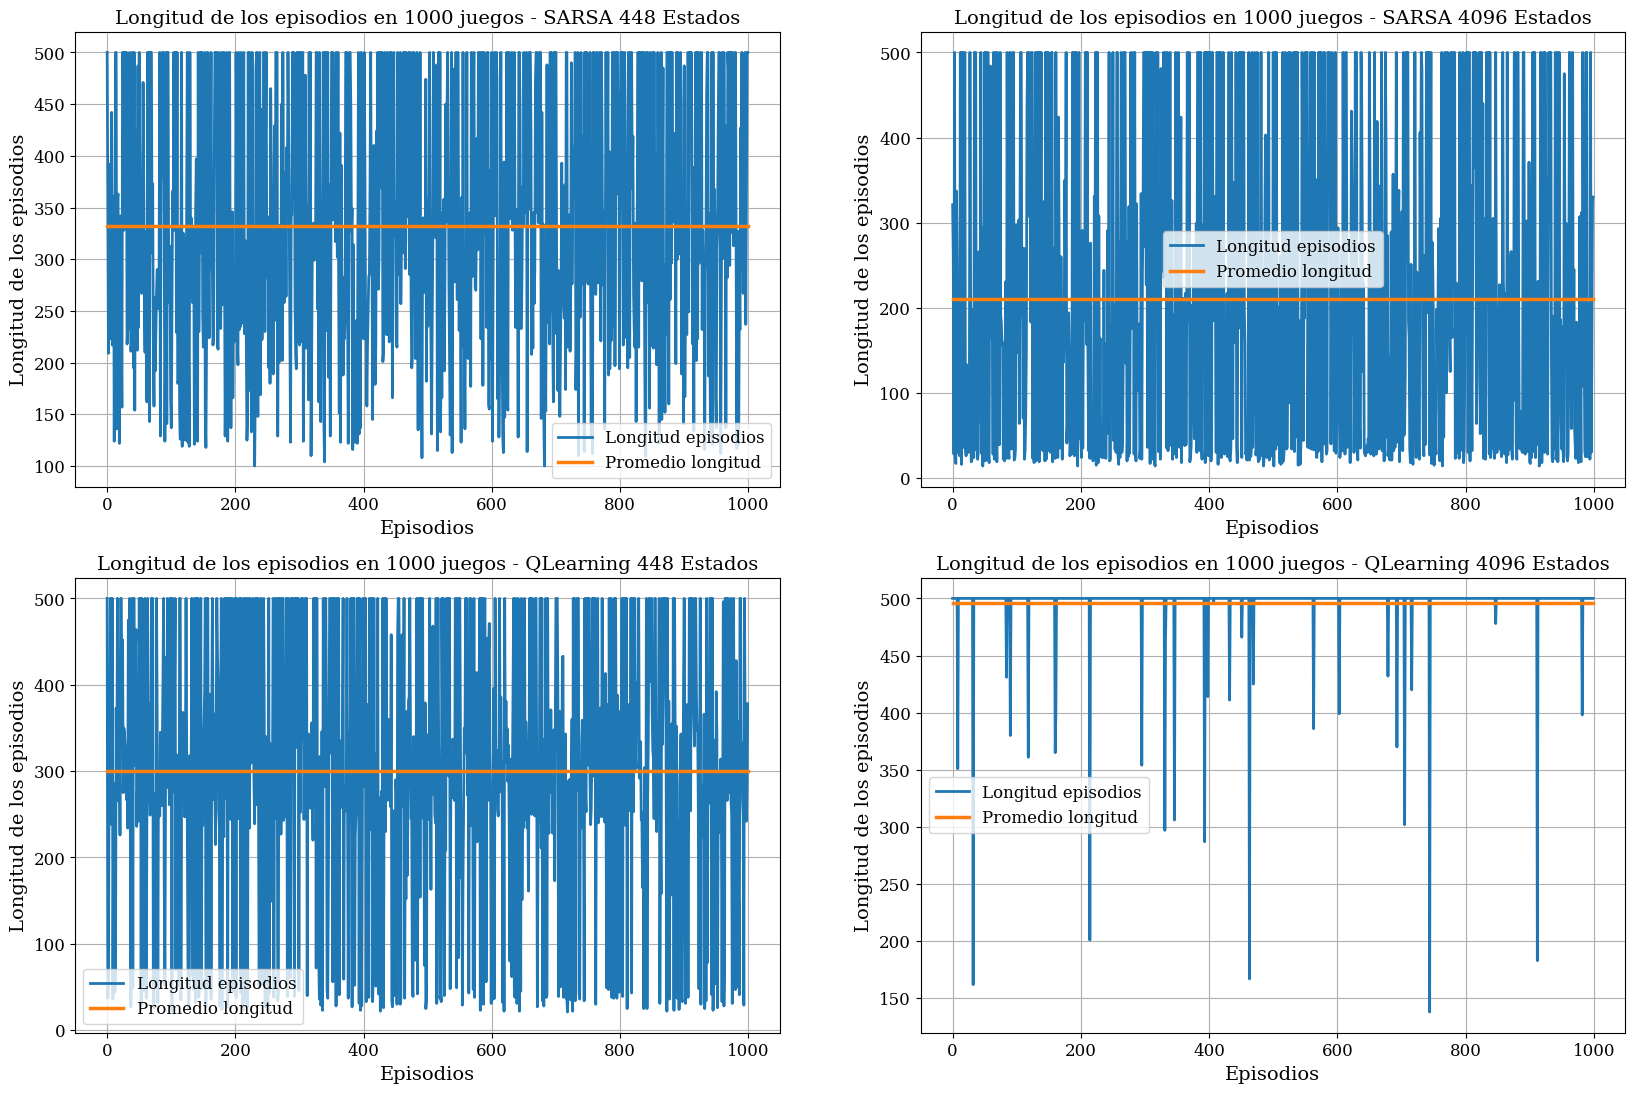

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,13))

ax[0][0].plot(lenSetsSARSA, lw = 2, label = 'Longitud episodios')
ax[0][0].plot(np.ones((len(lenSetsSARSA),1))*np.mean(lenSetsSARSA), lw = 2.5, label = 'Promedio longitud')
ax[0][0].set_title(f'Longitud de los episodios en {numberGames} juegos - SARSA 448 Estados', fontsize = 14)
ax[0][0].set_ylabel('Longitud de los episodios', fontsize = 14)
ax[0][0].set_xlabel('Episodios', fontsize = 14)
ax[0][0].legend(fontsize=12)
ax[0][0].grid()


ax[0][1].plot(lenSetsSARSA4k, lw = 2, label = 'Longitud episodios')
ax[0][1].plot(np.ones((len(lenSetsSARSA4k),1))*np.mean(lenSetsSARSA4k), lw = 2.5, label = 'Promedio longitud')
ax[0][1].set_title(f'Longitud de los episodios en {numberGames} juegos - SARSA 4096 Estados', fontsize = 14)
ax[0][1].set_ylabel('Longitud de los episodios', fontsize = 14)
ax[0][1].set_xlabel('Episodios', fontsize = 14)
ax[0][1].legend(fontsize=12)
ax[0][1].grid()

ax[1][0].plot(lenSetsQL, lw = 2, label = 'Longitud episodios')
ax[1][0].plot(np.ones((len(lenSetsQL),1))*np.mean(lenSetsQL), lw = 2.5, label = 'Promedio longitud')
ax[1][0].set_title(f'Longitud de los episodios en {numberGames} juegos - QLearning 448 Estados', fontsize = 14)
ax[1][0].set_ylabel('Longitud de los episodios', fontsize = 14)
ax[1][0].set_xlabel('Episodios', fontsize = 14)
ax[1][0].legend(fontsize=12)
ax[1][0].grid()

ax[1][1].plot(lenSetsQL4k, lw = 2, label = 'Longitud episodios')
ax[1][1].plot(np.ones((len(lenSetsQL4k),1))*np.mean(lenSetsQL4k), lw = 2.5, label = 'Promedio longitud')
ax[1][1].set_title(f'Longitud de los episodios en {numberGames} juegos - QLearning 4096 Estados', fontsize = 14)
ax[1][1].set_ylabel('Longitud de los episodios', fontsize = 14)
ax[1][1].set_xlabel('Episodios', fontsize = 14)
ax[1][1].legend(fontsize=12)
ax[1][1].grid()

<p align="justify">
En las gráficas se puede observar que el algortimo que mejor desempeño logra es QLearning en la versión de discretización fina, para 1000 intentos la mayoria se ubican en el máximo valor posible, sin embargo algunos episodios obtienen una baja duración. En el caso de los otros algoritmos se observa que varios episodios alcanzan los 500 pasos, no obstante la variación es alta, indicando curvas con marcada oscilación. El algoritmo que menor desempeño alcanza es SARSA en la discretización fina, resultado que resulta contraintuitivo, ya que se esperaria que al realizar una discretización más fina el rendimiento de los algoritmos aumente, como sucedio con QLearning. Se desconoce que motiva el bajo desempeño del algortimo pero podría relacionarse con el rango en el cual se probaron los hiper-parámetros y el número de episodios usados para el entrenamiento. 

<p align="justify">
Sin embargo, a nivel general los algoritmos resultan adecuados mejorando el comportamiento del sistema CarPole y logrando estabilizar el poste, pese a que este problema es díficil de manejar por las dinamicas que rigen su comportamiento y se accede a los estados en su versión discreta. En la siguiente Tabla se resumen los principales elementos del desempeño de los algoritmos, resaltando las mejores caracteriticas. En cuanto al tiempo de ejecución el algoritmo SARSA con 448 estados logra el menor valor, en el promedio de la longitud de episodios es para QLearning, algoritmo que tambien lográ la menor desviación estandar. También se puede destacar que el tiempo empleado en la ejecución de los algortimos de la discretización fina, para la cual se propusieron 4096 estados, es aproximadamente 10 veces que el tiempo de su versión en discretización cruda. 

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1Zb22F9K37lVlmB6oL-Kevlhx-MSd4IAO" width="1000"/>
    
    Figura 2. Tabla rendimiento de los algoritmos tabulares. 
</div>
</center>

----

# Algoritmos aproximación de funciones

<p align="justify">
En el paradigma de Aprendizaje por Refuerzo se busca, en la mayoría de algoritmos tradicionales, aproximar una función de valor $v(s)$ o $q(s,a)$. Al considerar que los estados $s$ son continuos o que se tienen conjuntos extensos de estados las téncias usuales de estimación de funciones de valor no se pueden aplicar, entonces se introduce el concepto de aproximación de funciones. A diferencia de la version tabular donde se estima para cada par $(s,a)$ un valor de $q$ el enfoque de aproximación de funciones sugiere considerar $q$ como una función dependiente de $s,a$, es decir $q:(s,a) \to \mathbb{R}$, con $s \in S$, $S \subset \mathbb{R}^d$. La función $q$ estará definida para el continuo de estados posible. Para aproximar la función $q$ se pueden utilizar los algoritmos típicos en esta área, sin embargo, por su capacidad de expresividad y por considerarse Aproximadores Universales las redes neuronales pueden ser ideales para esta tarea. En esta sección se implementan dos algotimos que siguen el concepto de aproximación de funciones basada en redes neuronales y que mejoran la política teniendo en cuenta la información de dica aproximación. Estos algoritmos, DeepSARSA y DQN se implementan para el ambiente de CartPole y se experimentan en dos arquitecturas de red. 

## Implementación algoritmos

<p align="justify">
En esta sección se implementarán los algoritmos de deep reinforcement learning DeepSarsa y DQN, esto se realiza para el caso del Cartpole con la ayuda de la librería Keras-RL, la cual se centra en la implementación de algoritmos de RL basados en modelos, lo que significa que se utilizan redes neuronales para aprender y tomar decisiones a través del aprendizaje por refuerzo.

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

### DeepSARSA

<p align="justify">
DeepSARSA se utiliza para mejorar el rendimiento en tareas complejas de toma de decisiones. Este algoritmo combina la técnica de SARSA (State-Action-Reward-State-Action) con redes neuronales profundas para la aproximación de la función $Q(s,a)$, esto ermite manejar espacios de estados de alta dimensionalidad y lo hace un método adecuado para tareas que involucren espacios de estados continuos. 
<p align="justify">
Para el entorno de Cartpole, el algoritmo DeepSARSA toma los siguientes pasos para aprender a realizar esta tarea:
<p align="justify">
Primero, se inicializan los pesos de las redes neuronales que se utilizan para aproximar las funciones de valor y política. A continuación, se reinicia el entorno a su estado inicial y se observa el estado inicial del entorno. Este estado se pasa a través de la red neuronal de la función de valor para obtener una estimación inicial del retorno esperado para cada acción. Luego, se elige una acción basándose en las probabilidades de salida de la función de política para el estado actual.
<p align="justify">
Después de elegir una acción, se observa el siguiente estado y la recompensa asociada del entorno. Se pasa el siguiente estado a través de la red neuronal de la función de valor para obtener una estimación del retorno esperado para cada acción posible. Se elige la siguiente acción basándose en las probabilidades de salida de la función de política para el nuevo estado. Los pesos de las redes de la función de valor y política se actualizan utilizando la regla de actualización SARSA para reducir la diferencia entre los retornos esperados del estado y acción actual y del siguiente estado y acción. Los pasos después de seleccionar la acción se repiten hasta que el episodio termine.
<p align="justify">
Idealmente, con el tiempo, el agente aprende a equilibrar el poste sobre el carro de manera más efectiva ajustando su política y estimaciones de la función de valor en función de las recompensas y transiciones observadas.

In [ ]:
# Liberias necesarias para la implementación 
from keras.optimizers import Adam, SGD, RMSprop, Nadam, Adadelta

# Agente deepSARSA de la libreria Keras-rl
from rl.agents import SARSAAgent
from rl.policy import EpsGreedyQPolicy

In [ ]:
def deepSARSAModel(epsilon, gamma, modelNeuronal, optimizer, lr, actionAvailable):
    # Esta función construye un modelo del agente DeepSARSA de la libreia Keras-rl
    # Entradas 
    # Epsilon = para la política epsilon greedy
    # gamma = factor de descuento
    # modelNeuronal = modelo de red neuronal para aproximar la función Q
    # optimizer = optimizador para encontrar los pesos de la red 
    # action Available = espacio de acciones 
    
    # Retorna
    # Objetivo SARSAAgent
    
    policy = EpsGreedyQPolicy()
    policy.epsilon = epsilon
    deepSARSA = SARSAAgent(model=modelNeuronal, nb_actions=len(actionAvailable), 
                       policy=policy, gamma = gamma)
    if optimizer == 'Adam': deepSARSA.compile(Adam(learning_rate = lr), metrics=["mse"])
    if optimizer == 'Nadam': deepSARSA.compile(Nadam(learning_rate = lr), metrics=["mae"])
    if optimizer == 'SGD': deepSARSA.compile(SGD(learning_rate = lr), metrics=["mse"])
    if optimizer == 'RMSprop': deepSARSA.compile(RMSprop(learning_rate = lr), metrics=["mse"])
    if optimizer == 'Adadelta': deepSARSA.compile(Adadelta(learning_rate = lr), metrics=["mse"])
    return deepSARSA

### DQN

<p align="justify">
DQN es un algoritmo que combina la técnica Q-learning con redes neuronales profundas para aprender políticas de toma de decisiones óptimas en entornos complejos y de alta dimensionalidad. La función de valor $Q(s,a)$ se aproxima mediante una red neuronal profunda. Para el caso de Cartpole, lo que realiza internamente el algoritmo es:

<p align="justify">
El primer paso es inicializar una red neuronal para aprender la función $Q$ óptima. Esta red neuronal es una red profunda que toma el estado del entorno como entrada y produce una estimación de la función $Q$ para cada posible acción. A continuación, se crea un búfer de experiencia (memoria), que se utiliza para almacenar las experiencias del agente en el entorno. El búfer de experiencia almacena los pares (estado, acción, recompensa, siguiente estado) que se utilizarán para entrenar la red neuronal. En cada paso en el entorno, se debe seleccionar una acción para el agente. La función $Q$ aprendida se utiliza para seleccionar la acción, y la acción seleccionada es aquella con el valor $Q$ más alto para el estado actual del entorno.

<p align="justify">
Una vez seleccionada una acción, se ejecuta en el entorno y se observa el nuevo estado y la recompensa obtenida. Este nuevo estado y recompensa se agregan al búfer de experiencia. La red neuronal debe actualizarse cada cierto número de pasos en el entorno utilizando las experiencias almacenadas. Se selecciona un lote aleatorio de muestras del búfer de experiencia, y se utiliza la retropropagación para actualizar los pesos de la red neuronal. Finalmente, los pasos después de seleccionar la acción se repiten hasta que se alcance un límite de tiempo o el agente resuelva el problema de Cartpole.

In [ ]:
# Agente DQN de la libreria keras-rl
from rl.agents.dqn import DQNAgent

from rl.memory import SequentialMemory
from rl.policy import EpsGreedyQPolicy
#from rl.policy import BoltzmannQPolicy

In [ ]:
def DQNModel(epsilon, gamma, modelNeuronal, optimizer, lr, actionAvailable, limitMemory, windowLength):
    memory = SequentialMemory(limit=limitMemory, window_length = windowLength)
    policy = EpsGreedyQPolicy()
    policy.epsilon = epsilon
    dqn = DQNAgent(model = modelNeuronal, memory=memory, policy=policy, nb_actions=actions, gamma = gamma)
    if optimizer == 'Adam': dqn.compile(Adam(learning_rate = lr), metrics=["mse"])
    if optimizer == 'Nadam': dqn.compile(Nadam(learning_rate = lr), metrics=["mse"])
    if optimizer == 'SGD': dqn.compile(SGD(learning_rate = lr), metrics=["mse"])
    if optimizer == 'RMSprop': dqn.compile(RMSprop(learning_rate = lr), metrics=["mse"])
    if optimizer == 'Adadelta': dqn.compile(Adadelta(learning_rate = lr), metrics=["mse"])
    return dqn

## Modelo 16 neuronas

<p align="justify">
Para este caso se plantea en la funcion de la red neuronal "modelMedium" con 3 capas de pesos y una primera operación de aplanamiento que convierte el tensor de entrada en un vector plano, necesario para conectar la entrada con la capa inicial densa con 4 neuronas y función de activación 'relu'. La siguiete es una capa oculta densa con 16 neuronas y función de activación 'relu'. Y por ultimo, otra capa densa con el número de neuronas igual al número de acciones y función de activación de tipo lienal ('linear'), que se utiliza para obtener la salida del modelo.

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=19M0O_2eapoFiIMgR6SaheyE0ku-Nk5Aw" width="800"/>
    
    Figura 3. Diagrama red neuronal 16 neuronas capa oculta.
</div>
</center>

In [ ]:
from tensorflow.keras import regularizers

def modelMedium(states, actions, windowsLen = 1):
    # Construcción modelo neuronal 
    
    # Entrada 
    # states = número de estados
    # actions = numero de acciones 
    # windowsLen = tamaño del lote 
    
    # Salida
    # model = modelo keras de la red neuronal 
    model = Sequential()
    model.add(Flatten(input_shape = (windowsLen, states)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

<p align="justify">
Para la implementación de los algoritmos no se incluye en el código la sintonización de hiper-parámetros, a diferencia de los métodos tabulares los métodos de aproximación de funciones con redes neuronales requiren una mayor configuración de estos elementos. En general los hiper-parámetros se pueden agrupar en:

* Hiper-parámetros del modelo: estos incluyen el número de capas de la red, el número de neuronas y las funciones de activación. En este caso el número de capas y neuroas ya fue fijado, en cuanto a la función de activación de las capas intermedias se eligieron funciones de tipo ReLU, las cuales funcionan de forma adecuada y tienen ciertas ventajas por ejemplo su implementación es sencilla y computacionalmente es eficiente de calcular, además, son funciones no lineales las cuales promueve la capacidad de aprendizaje no lineal. 

* Hiper-parámetros del entrenamiento de la red: estos incluyen el optimizador, factores de regularización, la tasa de aprendizaje, el tamaño de los lotes. Esta variedad de hiper-parámetros implica un gran espacio de busqueda, además la elección del optimizador implica incluir y fijar más hiper-parámetros. 

* Hiper-parámetros del algoritmo RL: factor de descuento $\gamma$ y elección del tipo de política, esta puede ser Epsilon Greedy o Boltzmann, a su vez estas políticas tienen otros hiper-parámetros que son $\epsilon$ y $\tau$, respectivamente. 

<p align="justify">
La amplia gama de configuraciones posibles de hiperparámetros dificulta el proceso de sintonización. En la implementación de los métodos se realizaron pruebas de forma diferida para evitar tiempos de ejecución prolongados. Se llevaron a cabo sesiones de entrenamiento y visualización de los valores intermedios, deteniendo el proceso y descartando aquellos conjuntos de hiperparámetros que no mostraban buenos resultados. Finalmente, se seleccionaron los valores que demostraron el mejor rendimiento en el historial de entrenamiento. Otro factor importante a tener en cuenta es la inicialización de los pesos de la red, en general la actualización de los pesos de la red depende del punto inicial, un mal punto de inicio puede llevar al algoritmo a zonas de no convergencia o a mínimos locales. 

### Implementación DeepSarsa con modelo 16 neuronas

In [ ]:
env = gym.make('CartPole-v1')
env.seed(202304)
np.random.seed(202304)

In [ ]:
states = env.observation_space.shape[0]
actions = env.action_space.n

<p align="justify">
Los hiperparámetros $\epsilon = 0.25$, $\gamma = 0.99$, optimizador 'Adam' y $\eta = 0.001$ tasa de aprendizaje de la red fueron fijados en estos valores que se obtuvieron despues de varios intentos combinando diferentes configuraciones y ejecutando el proceso de entrenamiento. Como se mencionó estos algoritmos permiten cambiar diferentes parámetros, los que no se nombraron se ejecutan de acuerdo con el valor por defecto de la libreria. Finalizado el entrenamiento se presenta la curva de aprendizaje, valor que corresponde a la longitud de los episodios despues de cada iteración del algotimo. 

In [ ]:
# Mejor combinación de hiper-parámetros 
modelNeuronal = modelMedium(states, actions)
epsilon = 0.25
gamma = 0.99
optimizer = 'Adam'
lr = 0.001
deepSARSA16 = deepSARSAModel(epsilon, gamma, modelNeuronal, optimizer, lr, [0,1])

In [ ]:
startTime = time.time()
historySarsa16 = deepSARSA16.fit(env, nb_steps=50000, visualize=False, verbose=1, log_interval=1000)
print(f'El método tardó en el aprendizaje {time.time() - startTime}')

Training for 50000 steps ...
Interval 1 (0 steps performed)
   1/1000 [..............................] - ETA: 2:58 - reward: 1.0000

C:\Users\Manuela\anaconda3\envs\cursoRLT4\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1000/1000 [==============================] - 21s 20ms/step - reward: 1.0000
99 episodes - episode_reward: 10.020 [8.000, 15.000] - loss: 2.845 - mse: 9.118 - mean_q: 4.546

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 18s 18ms/step - reward: 1.0000
99 episodes - episode_reward: 10.182 [8.000, 14.000] - loss: 2.992 - mse: 27.654 - mean_q: 8.119

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 17s 17ms/step - reward: 1.0000
90 episodes - episode_reward: 10.989 [8.000, 46.000] - loss: 7.555 - mse: 64.696 - mean_q: 10.947

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 20s 20ms/step - reward: 1.0000
100 episodes - episode_reward: 10.090 [8.000, 14.000] - loss: 2.742 - mse: 32.999 - mean_q: 8.504

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 19s 19ms/step - reward: 1.0000
88 episodes - episode_reward: 11.295 [8.000, 61.000] - loss: 3.780 - mse: 45.546 - mean_q: 

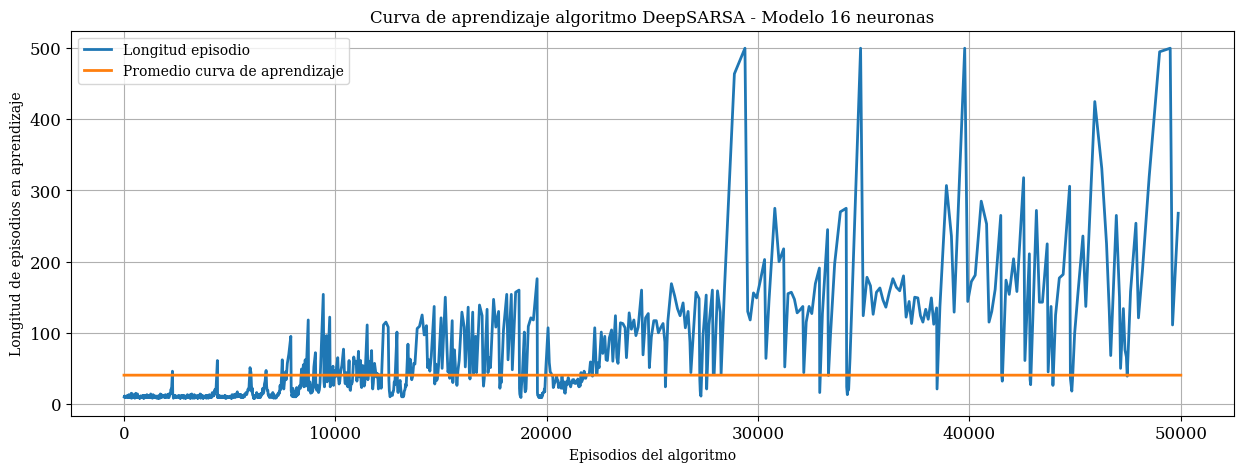

In [ ]:
# Curva de aprendizaje 
plt.figure(figsize=(15,5))
plt.title('Curva de aprendizaje algoritmo DeepSARSA - Modelo 16 neuronas')
plt.ylabel('Longitud de episodios en aprendizaje')
plt.xlabel('Episodios del algoritmo')
plt.grid()
plt.plot(historySarsa16.history['nb_steps'], historySarsa16.history['episode_reward'], lw = 2, label = 'Longitud episodio')
plt.plot(np.ones((len(range(50000)),))*np.mean(historySarsa16.history['episode_reward']), lw = 2, label = 'Promedio curva de aprendizaje')
plt.legend()
plt.show()

Una vez entrenado el agente deepSARSA se realiza una prueba sobre 1000 juegos, de estos resultados se obtiene el valor medio y la desviación estandar. Además se presenta la curva de longitud de episodios para cada juego. 

In [ ]:
historyGraphDeepSARSA16 = deepSARSA16.test(env, nb_episodes = 1000, visualize = False, verbose = 0)
meanSARSA16 = np.mean(historyGraphDeepSARSA16.history['episode_reward'])
stdSARSA16 = np.std(historyGraphDeepSARSA16.history['episode_reward'])

C:\Users\Manuela\anaconda3\envs\cursoRLT4\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
print(f'DeepSARSA')
print(f'Promedio de longitud de episodios {meanSARSA16}')
print(f'Desviación estandar: {stdSARSA16}')

DeepSARSA
Promedio de longitud de episodios 157.837
Desviación estandar: 71.43425250536328


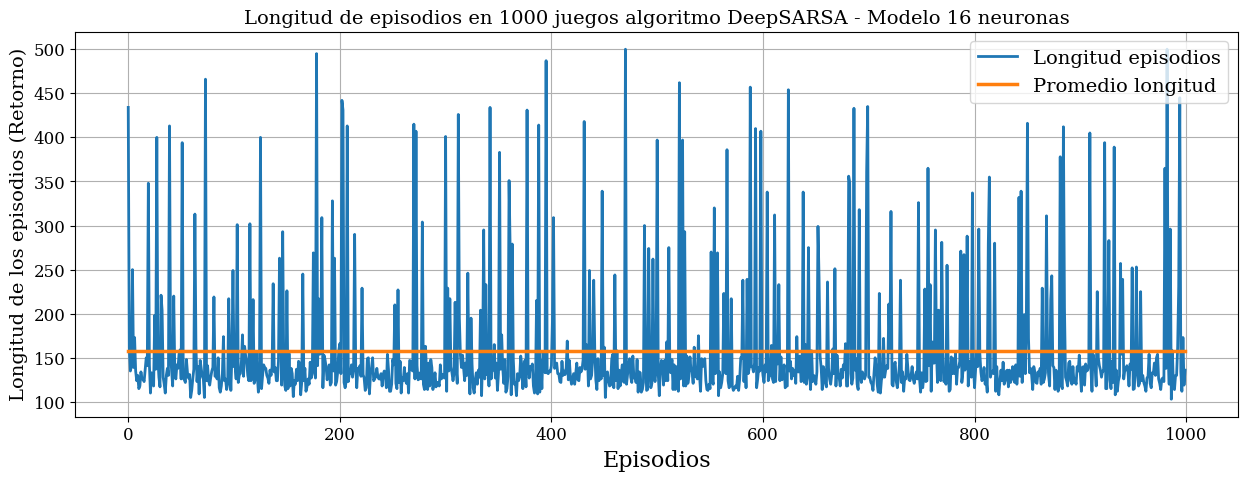

In [ ]:
# Curva de promedio en juegos  
plt.figure(figsize=(15,5))
plt.title('Longitud de episodios en 1000 juegos algoritmo DeepSARSA - Modelo 16 neuronas', fontsize = 14)
plt.ylabel('Longitud de los episodios (Retorno)', fontsize = 14)
plt.xlabel('Episodios', fontsize = 16)
plt.grid()
plt.plot(historyGraphDeepSARSA16.history['episode_reward'], lw = 2, label = 'Longitud episodios')
plt.plot(np.ones((1000,1))*np.mean(historyGraphDeepSARSA16.history['episode_reward']), lw = 2.5, label = 'Promedio longitud')
plt.legend(fontsize=14)
plt.show()

In [ ]:
deepSARSA16.save_weights("pesosPoliticaDeepSARSA16.h5") # Pesos mejores resultados

Similar al caso anterior tambien se incluye la visualización de los resultados con la política encontrada sobre diez episodios y se adjunta un video del desempeño. 

In [ ]:
env = gym.make('CartPole-v1')
env.render()
time.sleep(10)
_ = deepSARSA16.test(env, nb_episodes = 10, visualize = True, verbose = 1)
env.close()

Testing for 10 episodes ...
Episode 1: reward: 131.000, steps: 131
Episode 2: reward: 122.000, steps: 122
Episode 3: reward: 149.000, steps: 149
Episode 4: reward: 422.000, steps: 422
Episode 5: reward: 402.000, steps: 402
Episode 6: reward: 289.000, steps: 289
Episode 7: reward: 132.000, steps: 132
Episode 8: reward: 294.000, steps: 294
Episode 9: reward: 122.000, steps: 122
Episode 10: reward: 149.000, steps: 149


In [ ]:
HTML('<iframe width="500" height="350" src="https://www.youtube.com/embed/9HDv4GBbBTE" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\Manuela\anaconda3\envs\cursoRLT4\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


[Ver video DeepSARSA 16 Neuronas](https://www.youtube.com/embed/9HDv4GBbBTE)

### Implementación DQN con modelo 16 neuronas

In [ ]:
env = gym.make('CartPole-v1')
env.seed(202304)
np.random.seed(202304)

In [ ]:
states = env.observation_space.shape[0]
actions = env.action_space.n

<p align="justify">
Similar al proceso realizado para el algoritmo deepSARSA se realizaron pruebas de combinación de hiperparámetros, hasta encontrar los que mejor se desempeñaran.  Finalizado el proceso de entrenamiento se realizó la curva de entrenamiento de acuerdo con el historia del método `fit` y se probó sobre 1000 juegos el resultado del agente siguiendo la política encontrada con DQN. 

In [ ]:
# Mejores hiper-parámetros para DQN
epsilon = 0.13
gamma = 0.99
optimizer = 'Adadelta'
lr = 0.01
limitMemory = 10
windowLength = 1
modelNeuronal = modelMedium(states, actions, windowLength)
dqn16 = DQNModel(epsilon, gamma, modelNeuronal, optimizer, lr, [0,1], limitMemory, windowLength)

In [ ]:
startTime = time.time()
historyQN16 = dqn16.fit(env, nb_steps=50000, visualize=False, verbose=1, log_interval=1000)
print(f'El método tardó en el aprendizaje {time.time() - startTime}')

Training for 50000 steps ...
Interval 1 (0 steps performed)
1000/1000 [==============================] - 2s 2ms/step - reward: 1.0000
6 episodes - episode_reward: 160.167 [127.000, 185.000]

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 21s 21ms/step - reward: 1.0000
6 episodes - episode_reward: 146.333 [120.000, 222.000] - loss: 9.207 - mse: 2206.431 - mean_q: 67.329

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 21s 21ms/step - reward: 1.0000
5 episodes - episode_reward: 201.200 [119.000, 361.000] - loss: 8.047 - mse: 2145.447 - mean_q: 66.444

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 20s 20ms/step - reward: 1.0000
5 episodes - episode_reward: 203.200 [123.000, 500.000] - loss: 7.342 - mse: 1986.834 - mean_q: 63.819

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 24s 24ms/step - reward: 1.0000
6 episodes - episode_reward: 148.167 [134.000, 174.000] -

1000/1000 [==============================] - 19s 19ms/step - reward: 1.0000
3 episodes - episode_reward: 200.333 [185.000, 213.000] - loss: 2.475 - mse: 2170.242 - mean_q: 66.388

Interval 40 (39000 steps performed)
1000/1000 [==============================] - 19s 19ms/step - reward: 1.0000
4 episodes - episode_reward: 311.250 [202.000, 500.000] - loss: 5.726 - mse: 2097.020 - mean_q: 65.138

Interval 41 (40000 steps performed)
1000/1000 [==============================] - 19s 19ms/step - reward: 1.0000
2 episodes - episode_reward: 346.000 [192.000, 500.000] - loss: 3.549 - mse: 2589.869 - mean_q: 72.546

Interval 42 (41000 steps performed)
1000/1000 [==============================] - 20s 20ms/step - reward: 1.0000
3 episodes - episode_reward: 417.667 [253.000, 500.000] - loss: 8.970 - mse: 2779.935 - mean_q: 74.648

Interval 43 (42000 steps performed)
1000/1000 [==============================] - 19s 19ms/step - reward: 1.0000
2 episodes - episode_reward: 490.000 [480.000, 500.000] - lo

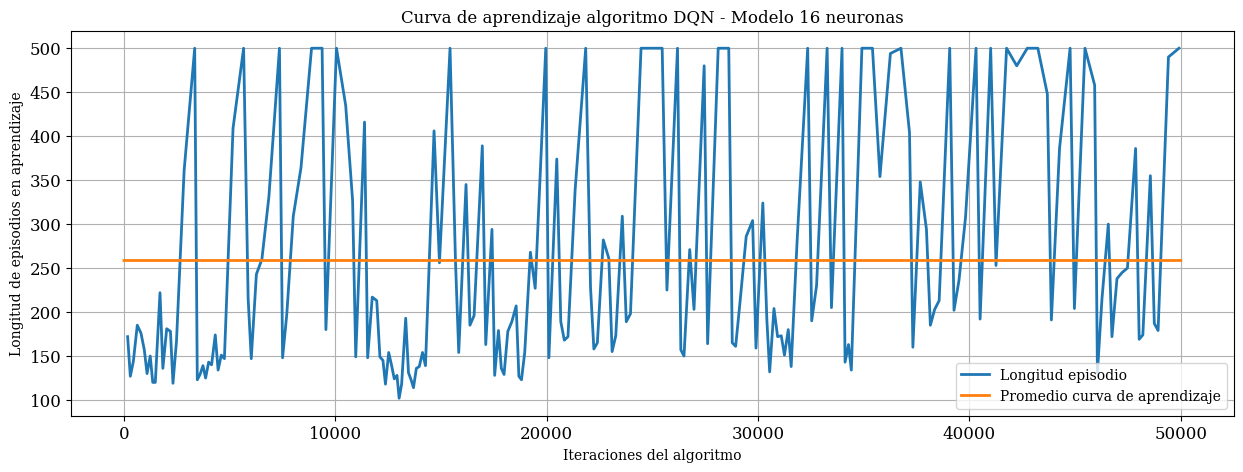

In [ ]:
# Curva de aprendizaje
plt.figure(figsize=(15,5))
plt.title('Curva de aprendizaje algoritmo DQN - Modelo 16 neuronas')
plt.ylabel('Longitud de episodios en aprendizaje')
plt.xlabel('Iteraciones del algoritmo')
plt.grid()
plt.plot(historyQN16.history['nb_steps'], historyQN16.history['episode_reward'], lw = 2, label = 'Longitud episodio')
plt.plot(np.ones((len(range(50000)),))*np.mean(historyQN16.history['episode_reward']), lw = 2, label = 'Promedio curva de aprendizaje')
plt.legend()
plt.show()

In [ ]:
historyGraphDQN16 = dqn16.test(env, nb_episodes = 1000, visualize = False, verbose = 0)
meanDQN16 = np.mean(historyGraphDQN16.history['episode_reward'])
stdDQN16 = np.std(historyGraphDQN16.history['episode_reward'])

C:\Users\Manuela\anaconda3\envs\cursoRLT4\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
print(f'DQN 16 Neuronas')
print(f'Promedio de longitud de episodios {meanDQN16}')
print(f'Desviación estandar: {stdDQN16}')

DQN 16 Neuronas
Promedio de longitud de episodios 462.837
Desviación estandar: 102.83088267150099


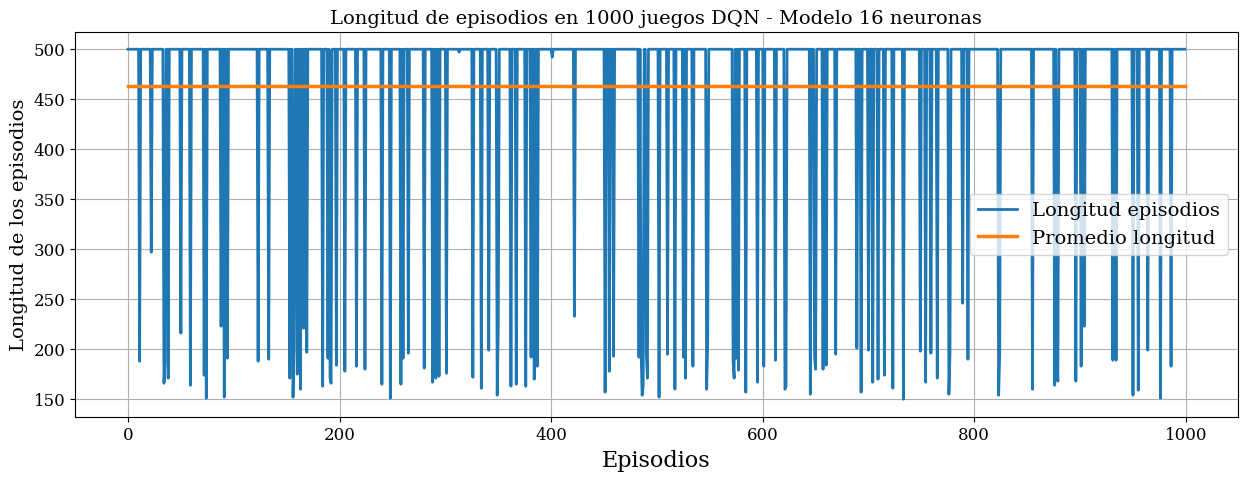

In [ ]:
# Curva de promedio en juegos  
plt.figure(figsize=(15,5))
plt.title('Longitud de episodios en 1000 juegos DQN - Modelo 16 neuronas', fontsize = 14)
plt.ylabel('Longitud de los episodios', fontsize = 14)
plt.xlabel('Episodios', fontsize = 16)
plt.grid()
plt.plot(historyGraphDQN16.history['episode_reward'], lw = 2, label = 'Longitud episodios')
plt.plot(np.ones((1000,1))*np.mean(historyGraphDQN16.history['episode_reward']), lw = 2.5, label = 'Promedio longitud')
plt.legend(fontsize=14)
plt.show()

In [ ]:
dqn16.save_weights("pesosPoliticaDQN16.h5") # Pesos mejores resultados

Similar al caso anterior tambien se incluye la visualización de los resultados con la política encontrada sobre diez episodios y se adjunta un video del desempeño. 

In [ ]:
env = gym.make('CartPole-v1')
env.render()
time.sleep(10)
_ = dqn16.test(env, nb_episodes = 10, visualize = True, verbose = 1)
env.close()

Testing for 10 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500
Episode 6: reward: 500.000, steps: 500
Episode 7: reward: 500.000, steps: 500
Episode 8: reward: 500.000, steps: 500
Episode 9: reward: 159.000, steps: 159
Episode 10: reward: 500.000, steps: 500


In [ ]:
HTML('<iframe width="500" height="350" src="https://www.youtube.com/embed/n4Q4rDaU-p0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

[Ver video DQN 16 Neuronas](https://www.youtube.com/embed/n4Q4rDaU-p0)

## Modelo 4 neuronas

<p align="justify">
Para este caso se plantea en la funcion de la red neuronal "modelSmall" con 3 capas, inicialmente se considera una operación de aplanamiento que convierte el tensor de entrada en un vector plano, necesario para conectar la entrada con la primera capa densa con 4 neuronas y función de activación 'relu'. La segunda capa es otra capa densa con 4 neuronas y función de activación 'relu'. Y por ultimo, otra capa densa con el número de neuronas igual al número de acciones y función de activación lineal ('linear'), que se utiliza para obtener la salida del modelo.

In [ ]:
def modelSmall(states, actions, windowsLen = 1):
    # Construcción modelo neuronal 
    
    # Entrada 
    # states = número de estados
    # actions = numero de acciones 
    # windowsLen = tamaño del lote 
    
    # Salida
    # model = modelo keras de la red neuronal 
    model = Sequential()
    model.add(Flatten(input_shape = (windowsLen, states)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=14mZ01ChEdslq0SmJNPHijh1R1L8fZx6o" width="500"/>
    
    Figura 4. Diagrama red neuronal 4 neuronas capa oculta.
</div>
</center>

### Implementación DeepSARSA modelo con 4 neuronas

In [ ]:
env = gym.make('CartPole-v1')
env.seed(202304)
np.random.seed(202304)

In [ ]:
states = env.observation_space.shape[0]
actions = env.action_space.n

In [ ]:
modelNeuronal = modelSmall(states, actions)
epsilon = 0.4 #0.4
gamma = 0.99 #0.99
optimizer = 'Adam'
lr = 0.011 # 0.011
deepSARSA4 = deepSARSAModel(epsilon, gamma, modelNeuronal, optimizer, lr, [0,1])

In [ ]:
startTime = time.time()
historySarsa4 = deepSARSA4.fit(env, nb_steps=20000, visualize=False, verbose=1, log_interval=1000)
print(f'El método tardó en el aprendizaje {time.time() - startTime}')

Training for 20000 steps ...
Interval 1 (0 steps performed)
1000/1000 [==============================] - 27s 26ms/step - reward: 1.0000
87 episodes - episode_reward: 11.046 [8.000, 33.000] - loss: 2.490 - mse: 22.855 - mean_q: 7.225

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 24s 24ms/step - reward: 1.0000
36 episodes - episode_reward: 28.806 [8.000, 131.000] - loss: 10.309 - mse: 215.910 - mean_q: 19.842

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 23s 23ms/step - reward: 1.0000
21 episodes - episode_reward: 47.571 [9.000, 143.000] - loss: 9.000 - mse: 366.893 - mean_q: 26.365

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 23s 23ms/step - reward: 1.0000
17 episodes - episode_reward: 57.294 [10.000, 138.000] - loss: 7.534 - mse: 348.827 - mean_q: 26.082

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 23s 23ms/step - reward: 1.0000
16 episodes - episode

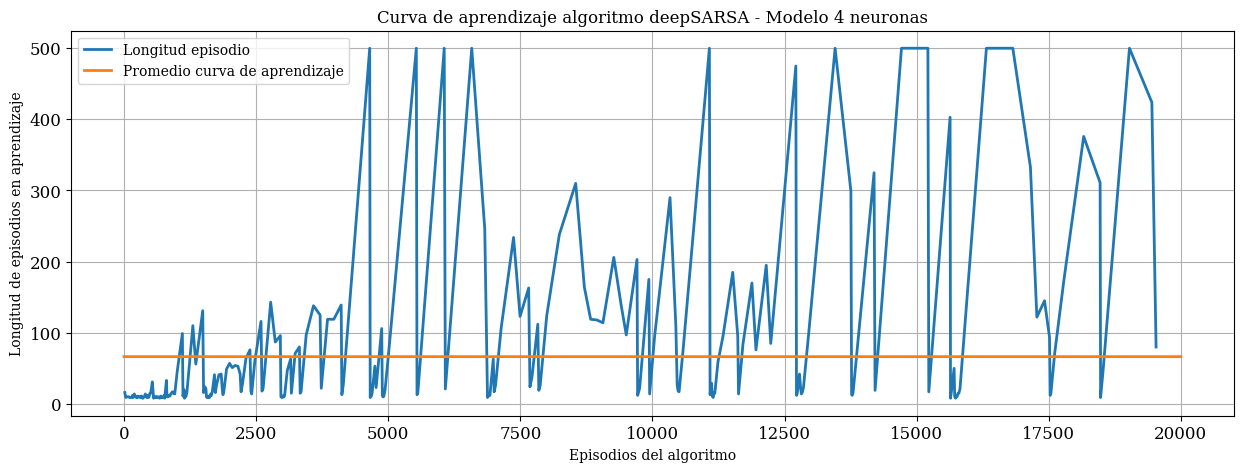

In [ ]:
# Curva de aprendizaje
plt.figure(figsize=(15,5))
plt.title('Curva de aprendizaje algoritmo deepSARSA - Modelo 4 neuronas')
plt.ylabel('Longitud de episodios en aprendizaje')
plt.xlabel('Episodios del algoritmo')
plt.grid()
plt.plot(historySarsa4.history['nb_steps'], historySarsa4.history['episode_reward'], lw = 2, label = 'Longitud episodio')
plt.plot(np.ones((len(range(20000)),))*np.mean(historySarsa4.history['episode_reward']), lw = 2, label = 'Promedio curva de aprendizaje')
plt.legend()
plt.show()

También se incluye la visualización de los resultados con la política encontrada sobre diez episodios y se adjunta un video del desempeño. 

In [ ]:
env = gym.make('CartPole-v1')
env.render()
time.sleep(10)
_ = deepSARSA4.test(env, nb_episodes = 10, visualize = True, verbose = 1)
env.close()

Testing for 10 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500
Episode 6: reward: 500.000, steps: 500
Episode 7: reward: 500.000, steps: 500
Episode 8: reward: 500.000, steps: 500
Episode 9: reward: 500.000, steps: 500
Episode 10: reward: 500.000, steps: 500


In [ ]:
historyGraphDeepSARSA4 = deepSARSA4.test(env, nb_episodes = 1000, visualize = False, verbose = 0)
meanSARSA4 = np.mean(historyGraphDeepSARSA4.history['episode_reward'])
stdSARSA4 = np.std(historyGraphDeepSARSA4.history['episode_reward'])

C:\Users\Manuela\anaconda3\envs\cursoRLT4\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
print(f'DeepSARSA 4 Neuronas')
print(f'Promedio de longitud de episodios {meanSARSA4}')
print(f'Desviación estandar: {stdSARSA4}')

DeepSARSA 4 Neuronas
Promedio de longitud de episodios 500.0
Desviación estandar: 0.0


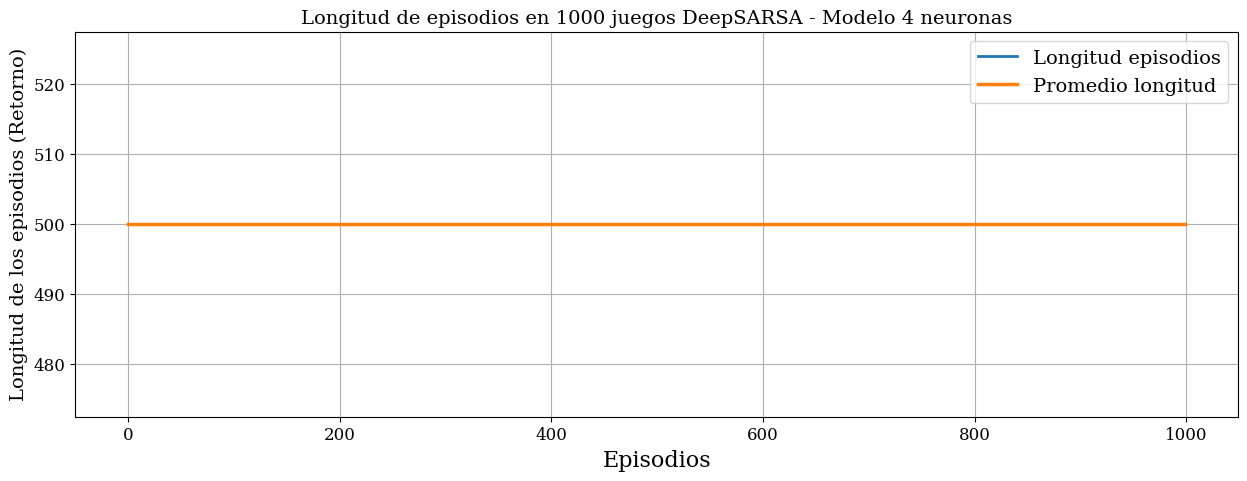

In [ ]:
# Curva de promedio en episodios  
plt.figure(figsize=(15,5))
plt.title('Longitud de episodios en 1000 juegos DeepSARSA - Modelo 4 neuronas', fontsize = 14)
plt.ylabel('Longitud de los episodios (Retorno)', fontsize = 14)
plt.xlabel('Episodios', fontsize = 16)
plt.grid()
plt.plot(historyGraphDeepSARSA4.history['episode_reward'], lw = 2, label = 'Longitud episodios')
plt.plot(np.ones((1000,1))*np.mean(historyGraphDeepSARSA4.history['episode_reward']), lw = 2.5, label = 'Promedio longitud')
plt.legend(fontsize=14)
plt.show()

In [ ]:
deepSARSA4.save_weights("pesosPoliticaDeepSARSA4.h5") # Pesos mejores resultados

In [ ]:
HTML('<iframe width="500" height="350" src="https://www.youtube.com/embed/7Jj_Dxon5Mo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

[Ver video deepSARSA 4 Neuronas](https://www.youtube.com/embed/7Jj_Dxon5Mo)

### Implementación DQN modelo con 4 neuronas

In [ ]:
env = gym.make('CartPole-v1')
env.seed(202304)
np.random.seed(202304)

In [ ]:
states = env.observation_space.shape[0]
actions = env.action_space.n

In [ ]:
epsilon = 0.2 #0.15
gamma = 0.99
optimizer = 'Adadelta'
lr = 0.01
limitMemory = 10
windowLength = 1
modelNeuronal = modelSmall(states, actions, windowLength)
dqn4 = DQNModel(epsilon, gamma, modelNeuronal, optimizer, lr, [0,1], limitMemory, windowLength)

In [ ]:
startTime = time.time()
historyQND4 = dqn4.fit(env, nb_steps=20000, visualize=False, verbose=1, log_interval=1000)
print(f'El método tardó en el aprendizaje {time.time() - startTime}')

Training for 20000 steps ...
Interval 1 (0 steps performed)
1000/1000 [==============================] - 5s 4ms/step - reward: 1.0000
9 episodes - episode_reward: 102.222 [49.000, 118.000]

Interval 2 (1000 steps performed)
1000/1000 [==============================] - 34s 34ms/step - reward: 1.0000
9 episodes - episode_reward: 110.444 [102.000, 115.000] - loss: 9.160 - mse: 1716.727 - mean_q: 58.047

Interval 3 (2000 steps performed)
1000/1000 [==============================] - 30s 30ms/step - reward: 1.0000
9 episodes - episode_reward: 109.889 [100.000, 116.000] - loss: 10.532 - mse: 1723.551 - mean_q: 58.476

Interval 4 (3000 steps performed)
1000/1000 [==============================] - 30s 30ms/step - reward: 1.0000
9 episodes - episode_reward: 113.333 [105.000, 120.000] - loss: 10.309 - mse: 1807.090 - mean_q: 59.815

Interval 5 (4000 steps performed)
1000/1000 [==============================] - 31s 31ms/step - reward: 1.0000
9 episodes - episode_reward: 115.667 [109.000, 125.000] 

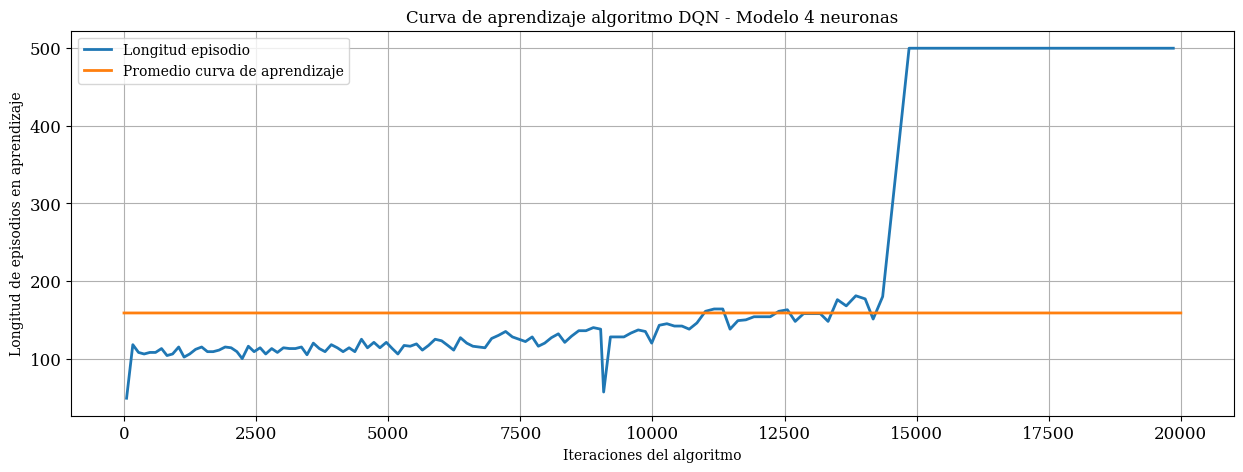

In [ ]:
# Curva de aprendizaje
plt.figure(figsize=(15,5))
plt.title('Curva de aprendizaje algoritmo DQN - Modelo 4 neuronas')
plt.ylabel('Longitud de episodios en aprendizaje')
plt.xlabel('Iteraciones del algoritmo')
plt.grid()
plt.plot(historyQND4.history['nb_steps'], historyQND4.history['episode_reward'], lw = 2, label = 'Longitud episodio')
plt.plot(np.ones((len(range(20000)),))*np.mean(historyQND4.history['episode_reward']), lw = 2, label = 'Promedio curva de aprendizaje')
plt.legend()
plt.show()

In [ ]:
env = gym.make('CartPole-v1')
env.render()
time.sleep(10)
_ = dqn4.test(env, nb_episodes = 10, visualize = True, verbose = 1)
env.close()

Testing for 10 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500
Episode 6: reward: 500.000, steps: 500
Episode 7: reward: 500.000, steps: 500
Episode 8: reward: 500.000, steps: 500
Episode 9: reward: 500.000, steps: 500
Episode 10: reward: 500.000, steps: 500


In [ ]:
historyGraphDQN4 = dqn4.test(env, nb_episodes = 1000, visualize = False, verbose = 0)
meanDQN4 = np.mean(historyGraphDQN4.history['episode_reward'])
stdDQN4 = np.std(historyGraphDQN4.history['episode_reward'])

In [ ]:
print(f'DQN 4 Neuronas')
print(f'Promedio de longitud de episodios {meanDQN4}')
print(f'Desviación estandar: {stdDQN4}')

DQN 4 Neuronas
Promedio de longitud de episodios 496.651
Desviación estandar: 18.773044478720013


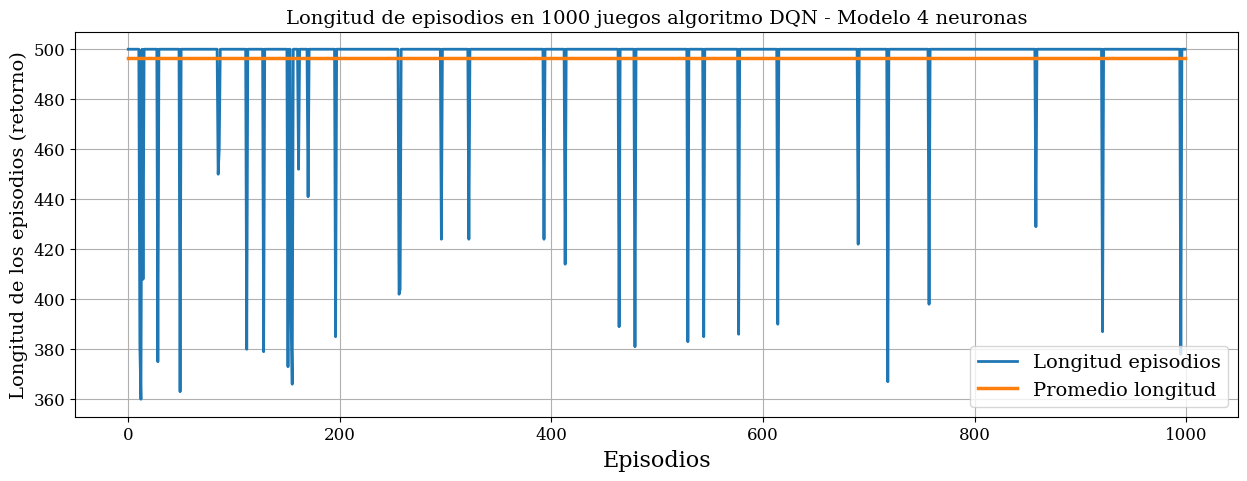

In [ ]:
# Curva de promedio en episodios  
plt.figure(figsize=(15,5))
plt.title('Longitud de episodios en 1000 juegos algoritmo DQN - Modelo 4 neuronas', fontsize = 14)
plt.ylabel('Longitud de los episodios (retorno)', fontsize = 14)
plt.xlabel('Episodios', fontsize = 16)
plt.grid()
plt.plot(historyGraphDQN4.history['episode_reward'], lw = 2, label = 'Longitud episodios')
plt.plot(np.ones((1000,1))*np.mean(historyGraphDQN4.history['episode_reward']), lw = 2.5, label = 'Promedio longitud')
plt.legend(fontsize=14)
plt.show()

In [ ]:
dqn4.save_weights("pesosPoliticaDQN4.h5") # Pesos mejores resultados

In [ ]:
HTML('<iframe width="500" height="350" src="https://www.youtube.com/embed/0V3GG3qPovg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

[Ver video DQN 4 Neuronas](https://www.youtube.com/embed/0V3GG3qPovg)

---

<p align="justify">
En esta sección los algoritmos de aproximación de funciones se evaluaron en 1000 juegos, los resultados de la duración de los episodios se presentaron en las graficas de cada método. Para complementar esta información se incluye en la siguiente tabla el resumen de las metrícas relevantes de esta evaluación. En la tabla se resaltas las características que señalan los mejores comportamientos. 

<p align="justify">
Estos resultados indican que todos los algoritmos de aproximación de funciones, a excepción de DeepSARSA con 16 neuronas que solo logra un promedio de 157.83, se comportaron de manera adecuada. En promedio, para estos algoritmos de buen rendimiento, la longitud de episodios en 1000 juegos se ubica por encima de 460, lo cual es muy favorable ya que el máximo posible es 500. En cuando a la desviación estandar el método DQN y DeepSARSA con 4 neuronas son los que mejor se comportan logrando desviaciones bajas, incluso una política con desviación nula. La métrica relacionada con el tiempo de entrenamiento de los algoritmos indica que estos tardan alrededor de 10 minutos para los algoritmos de 4 neuronas, fijados en 20.000 iteraciones, y 15 minuto para los algoritmos de 16 neuroas y 50000 iteraciones. En general el método de DeepSARSA con 4 neuronas es el que mejor se comporta, logrando el menor tiempo total de entrenamiento, el máximo posible de la longitud el episodio en 1000 juegos y desviación nula. 

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=15RJUmP1K-_NOeKRCLnp92YvVMw65kuGk" width="1000"/>
    
    Figura 5. Tabla rendimiento de los algoritmos con aproximación de funciones. 
</div>
</center>

# Discusión de resultados

<p align="justify">
Tras llevar a cabo los experimentos computacionales, se han identificado una serie de puntos de discusión relevantes que buscan establecer una comparativa entre los algoritmos tabulares y los algoritmos de aproximación de funciones. El objetivo de esta comparación es resaltar las dificultades y ventajas asociadas con cada enfoque.
<p align="justify">
1. En términos generales, los algoritmos de aproximación de funciones muestran un mejor desempeño en comparación con los métodos tabulares, utilizando la longitud de los episodios en 1000 juegos como métrica de comparación. Estos métodos exhiben una menor desviación y tienen la capacidad de encontrar políticas que resuelven de manera excelente el problema planteado, logrando incluso que para el algoritmo DeepSARSA 4 neuronas todos los episodios en los 1000 juegos alcancen el valor máximo posible de 500 pasos. Por otro lado, en los métodos tabulares, la desviación se encuentra por encima de 123 pasos, con la excepción del método QLearning con aproximación de 448 estados, que muestra una mejoría. Sin embargo, estos resultados contrastan con los métodos de aproximación de funciones, donde se alcanza un valor máximo de la desviación correspondiente a 102 pasos utilizando el método DQN con un modelo de 16 neuronas.
<p align="justify">
2. En cuanto al tiempo necesario para lograr la convergencia a una política adecuada, se observa que los métodos tabulares requieren menos tiempo en comparación con los métodos de aproximación de funciones. Sin embargo, es importante tener en cuenta que este tiempo está relacionado con el número de iteraciones establecido para cada algoritmo. En la implementación realizada, se fijó previamente el número de iteraciones para ambos enfoques. Sin embargo, para realizar una comparación justa, se podría considerar detener los algoritmos cuando se cumpla algún criterio que indique la consecución de una política adecuada. De esta manera, se tendría una base más equitativa para comparar el tiempo de convergencia entre los métodos tabulares y los de aproximación de funciones.
<p align="justify">
Además, es relevante destacar que el tiempo de ejecución también puede ser influenciado por otros factores, como el aumento en el número de discretizaciones de los estados en el caso de los métodos tabulares, o el incremento en el número de neuronas en la red neuronal en el caso de los métodos de aproximación de funciones. Estos ajustes pueden afectar tanto el tiempo requerido para lograr la convergencia como el tiempo de ejecución por cada iteración del algoritmo.

<p align="justify">
3. La sintonización de hiperparámetros es un aspecto crucial en estos algoritmos. En el caso de los algoritmos tabulares, este proceso no resulta extenso y se pueden emplear búsquedas en grilla para establecer una combinación óptima de los hiperparámetros, como $\alpha$, $\epsilon$, e incluso $\gamma$. La búsqueda en grilla es una metodología sencilla, similar a la propuesta en este documento, donde se elige un conjunto de hiperparámetros, se entrena y evalúa el rendimiento, y finalmente se selecciona aquel conjunto que maximice la longitud de los episodios. Aunque esta metodología funciona, también se pueden implementar estrategias más sofisticadas que permitan una exploración eficiente del espacio de hiperparámetros. 

<p align="justify">
4. En contraste, la sintonización de hiperparámetros en los algoritmos de aproximación de funciones se vuelve un proceso tedioso, complejo y no intuitivo. Se realizaron pruebas con distintas configuraciones y se observó que pequeñas variaciones pueden tener un impacto drástico en el rendimiento obtenido. Este efecto se magnifica cuando hay múltiples hiperparámetros que ajustar, llegando a un punto en el cual estos algoritmos se vuelven cada vez más complejos y resulta difícil comprender cómo los conjuntos de hiperparámetros modifican la salida del modelo. Esto genera modelos incomprensibles y dificulta la búsqueda de la combinación óptima. Para lograr los resultados de este taller en particular, se dedicó aproximadamente una semana exclusivamente a establecer valores adecuados de hiperparámetros, proceso que resulto demasiado tédioso y como se ha mencionado en algún punto se pierde el sentido de interpretabilidad del algoritmo y solo se busca el resultado adecuado, fijando parámetros que resultan totalmente anti-intuitivos. 
<p align="justify">
5. Se considera que, para el caso de los algoritmos de aproximación de funciones, si se cuenta con acceso a un sistema informático más potente y la capacidad de paralelizar procesos, sería posible entrenar varios modelos variando ampliamente los hiperparámetros y así obtener resultados más exhaustivos. 
<p align="justify">
6. Un hiperparámetro que no es común pero que tiene un impacto drástico en el desempeño de los algoritmos es el punto de inicialización de los pesos (w) de las redes neuronales. Este valor se establece internamente en las bibliotecas de Keras. A través de varios experimentos, se pudo constatar que, a pesar de inicializar semillas de generación de números aleatorios, los resultados variaban incluso al mantener los mismos hiperparámetros. Simplemente repetir el proceso conducía a cambios significativos en los resultados. Debido a esta razón, el proceso de inicialización de pesos es crucial y se considera una fuente de inestabilidad y dificultad para replicar los resultados. Esto planteó desafíos en el desarrollo de este taller y dificultó el establecimiento de criterios consistentes para la variación de hiperparámetros.
<p align="justify">
7. La implementación de los algoritmos tabulares se realizó utilizando código propio con el uso de bibliotecas tradicionales como NumPy. En cambio, para los algoritmos de aproximación de funciones se utilizó la biblioteca keras-rl2. Esta biblioteca facilita la implementación de agentes de RL y proporciona una forma sencilla de compilar, entrenar y evaluar estos procesos. Además, es compatible con el entorno CartPole.
<p align="justify">
Aunque se resaltan las ventajas de utilizar esta biblioteca, también se encontraron limitaciones en términos de flexibilidad y capacidad de iteración directa. La implementación de estos métodos puede ser altamente compleja, pero la biblioteca encapsula todo en una "caja negra", lo que dificulta realizar pruebas o realizar cambios no estándar. En ocasiones, la consola arrojaba errores provenientes de la biblioteca que resultaban incomprensibles y obligaban a reiniciar el sistema, lo que complicaba aún más la búsqueda de parámetros adecuados. Aunque el entrenamiento iba bien, la aparición de estos errores dificultaba su corrección sin tener que reiniciar el sistema.
<p align="justify">
La posibilidad de implementar los algoritmos de manera sencilla y clara, como en el caso de los algoritmos tabulares, brinda flexibilidad e interpretabilidad al proceso. En contraste, el uso de bibliotecas puede presentar limitaciones y obstáculos en términos de personalización y resolución de problemas específicos.
<p align="justify">
8. La arquitectura de las redes utilizadas en los algoritmos de aproximación de funciones desempeña un papel crucial en su capacidad para expresar y modelar la función objetivo. Si bien podría pensarse que aumentar el número de neuronas y capas mejoraría la capacidad de aproximación, esta suposición no siempre es acertada. De hecho, agregar más parámetros al modelo no garantiza un rendimiento óptimo y puede llevar al sobreajuste. Además, la estimación de un mayor número de parámetros puede requerir más iteraciones para determinar los valores adecuados.
<p align="justify">
En los experimentos realizados, se observó que el modelo con solo 4 neuronas superó al modelo de 16 en ambos algoritmos. Esto sugiere que una arquitectura de red más pequeña puede ser suficiente para resolver el problema con éxito. Este resultado es consistente con la teoría de modelos parsimoniosos, que postula que, en igualdad de condiciones, el modelo más simple es el mejor. Por lo tanto, se puede concluir que una red con 4 neuronas es una elección adecuada para abordar el problema, además en el modelo de 16 neuronas existe un riesgo potencial de caer en overfitting.


----

[Lista de reproducción videos de política encontradas](https://www.youtube.com/playlist?list=PLt1RGILQ3nPmN0zZJlewKl5R5Xp4oNhr9)